Steps:

1)Extracting Time series features for all sensors  and making an excel file  from them

2)using feature selection or usinng Lasso to do the  selection and regression together

3)Classification of PD and HC group to find top ranked features

4)Estimating the rigidity number using Regression

5)for classification and regression use leave one out instead of cross validation

6)report mean and std as results

7)saving the wavelet spectrograms as pictures for each single sensor for each hand and use them as pre-trained VGG16 for PD and HC classification, or PD with UPDRS of 2 or 3

8)using GRU or LSTM as end to end method

Necessity of Considering Sex of Participants in Research: Observations Drawn From Resistance Training Studies of Older Adults


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Some points from Ahmad's thesis:


The sensor on the wrist was mounted in a way that
the direction along the arm was ‘y’, the one perpendicular to the palm was ‘z’, and the third one
was ‘x’. Since the subjects’ arm might have not necessarily swung in the xy plane (the plane that
is perpendicular to the body plane), singular value decomposition (SVD–also known as principal
component analysis [64]) was done to find linearly uncorrelated directions. The first principal
component was chosen as the angular velocity in the new ‘x’ direction


Regression for rigidity of PD data ("this simple test will enable the clinicians to quantitatively measure rigidity as opposed to the qualitative approaches used in UPDRS.")

classification of the affected hand and nonaffected hand ("accuracy; early detection and diagnosis of Parkinson’s disease have been reported using the arm swing magnitude and asymmetry rather than the leg ")


finding asymetry of two hands as a feature to predict parkinson


1)classification with both group
2)finding the best features for classification
3)using those features for regression and finding the rigidity number

deep learning regression
State estimation via a Kalman filter has been proposed as a theoretical framework to explore
feedforward and feedback processes during normal motor performance, and may therefore provide
a more direct measure of motor dysfunction in PD

 removal of time-lags
 We preprocess the data by employing filters for detrending, downsampling, removal of saturation effects, and removal of time-lags

 Pendulum = Low-pass filter(ordr 2),Interpolation(order1)

The cutoff frequency is chosen to be 8 Hz for data sets from squeeze bulb (Chapters 3),
pendulum (Chapter 4), and glass rod (Chapter 5) experimental setups. This filter has a fairly sharp
attenuation without excessive distortion in the magnitude of nearby frequencies. We evaluated
butterworth, Bessel, and elliptic low-pass filters, and found the fourth order butterworth filter
to be the most effective on all data sets (Figure 2.4). Equation (2.1) shows the filter frequency
response. Parkinson’s tremor usually occurs at 2–6 Hz, and the input signals occur at around
0.25–1 Hz


. Most of statistical tests rely on the assumption that
the data has a Gaussian distribution which rarely is the case for biomedical data. Therefore, transformations could be used to make the distribution Gaussian. The most common transformation is
log-ratio transformation that is used in this thesis.


The following model parameters were considered: damping ratio, natural frequency, decay rate,
peak time, rise time, settling time, steady state output to the reference, and RMS error

In addition to improvements in accuracy, the bootstrapping approach ensures robustness to outliers or transients that may have occurred in the original data.

 this simple test will enable the clinicians to quantitatively measure rigidity as opposed to
the qualitative approaches used in UPDRS

accuracy; early detection and diagnosis of Parkinson’s disease have been reported using the arm
swing magnitude and asymmetry rather than the leg

Among all of the preprocessing steps mentioned in Chapter 2 only signal conditioning is used here.
There is no input to this system as the arm is passively swinging and hence no input-output time
lag is defined. Nonlinear effects are also mitigated to a decent extent using the air splint


We also selected the initial time point for the output signal
manually. We, essentially did the modeling with an output signal starting from the first nonzero
velocity logged by the sensor.

mistakes in previous report : 1)not considering only the handedness

In [ ]:
"""importing libraries"""
from scipy.signal import filtfilt
from scipy import stats
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy
import os
from scipy.signal import find_peaks, peak_prominences
import openpyxl
import statistics
from scipy.fft import fft, ifft
import pywt
from numpy import trapz
%pip install xlsxwriter
import xlsxwriter
from sklearn.preprocessing import StandardScaler
from numpy import sqrt
from numpy import mean
from numpy import absolute
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import KFold
from numpy import std
from sklearn.model_selection import LeaveOneOut
from sklearn.decomposition import PCA


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


## Data Visualisation

Step1

/content/drive/MyDrive/all_data/N1_L.csv
/content/drive/MyDrive/all_data/N1_R.csv
/content/drive/MyDrive/all_data/N2_L.csv
/content/drive/MyDrive/all_data/N2_R.csv
/content/drive/MyDrive/all_data/N3_L.csv
/content/drive/MyDrive/all_data/N3_R.csv
/content/drive/MyDrive/all_data/N4_L.csv
/content/drive/MyDrive/all_data/N4_R.csv
/content/drive/MyDrive/all_data/N5_L.csv
/content/drive/MyDrive/all_data/N5_R.csv
/content/drive/MyDrive/all_data/N6_L.csv
/content/drive/MyDrive/all_data/N6_R.csv
/content/drive/MyDrive/all_data/N7_L.csv
/content/drive/MyDrive/all_data/N7_R.csv
/content/drive/MyDrive/all_data/N8_L.csv
/content/drive/MyDrive/all_data/N8_R.csv
/content/drive/MyDrive/all_data/N9_L.csv
/content/drive/MyDrive/all_data/N9_R.csv
/content/drive/MyDrive/all_data/N10_L.csv
/content/drive/MyDrive/all_data/N10_R.csv
/content/drive/MyDrive/all_data/PA1_L.csv


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:69: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


/content/drive/MyDrive/all_data/PA1_R.csv


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:69: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


/content/drive/MyDrive/all_data/PA2_L.csv


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:69: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


/content/drive/MyDrive/all_data/PA2_R.csv


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:69: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


/content/drive/MyDrive/all_data/PA4_L.csv


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:69: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


/content/drive/MyDrive/all_data/PA4_R.csv


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:69: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


/content/drive/MyDrive/all_data/PA5_L.csv


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:69: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


/content/drive/MyDrive/all_data/PA5_R.csv


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:69: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


/content/drive/MyDrive/all_data/PA6_L.csv


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:69: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


/content/drive/MyDrive/all_data/PA6_R.csv


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:69: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


/content/drive/MyDrive/all_data/PA7_L.csv


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:69: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


/content/drive/MyDrive/all_data/PA7_R.csv


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:69: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


/content/drive/MyDrive/all_data/PA8_L.csv


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:69: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


/content/drive/MyDrive/all_data/PA8_R.csv


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:69: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


/content/drive/MyDrive/all_data/PA9_L.csv


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:69: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


/content/drive/MyDrive/all_data/PA9_R.csv


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:69: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


/content/drive/MyDrive/all_data/PA10_L.csv


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:69: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


/content/drive/MyDrive/all_data/PA10_R.csv


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:69: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


/content/drive/MyDrive/all_data/PB2_L.csv


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:69: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


/content/drive/MyDrive/all_data/PB2_R.csv


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:69: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


/content/drive/MyDrive/all_data/PB4_L.csv


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:69: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


/content/drive/MyDrive/all_data/PB4_R.csv


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:69: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


/content/drive/MyDrive/all_data/PB5_L.csv


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:69: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


/content/drive/MyDrive/all_data/PB5_R.csv


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:69: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


/content/drive/MyDrive/all_data/PB6_L.csv


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:69: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


/content/drive/MyDrive/all_data/PB6_R.csv


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:69: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


/content/drive/MyDrive/all_data/PB7_L.csv


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:69: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


/content/drive/MyDrive/all_data/PB7_R.csv


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:69: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


/content/drive/MyDrive/all_data/PB8_L.csv


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:69: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


/content/drive/MyDrive/all_data/PB8_R.csv


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:69: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


/content/drive/MyDrive/all_data/PB9_L.csv


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:69: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


/content/drive/MyDrive/all_data/PB9_R.csv


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:69: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


/content/drive/MyDrive/all_data/PB10_L.csv


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:69: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


/content/drive/MyDrive/all_data/PB10_R.csv


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:69: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


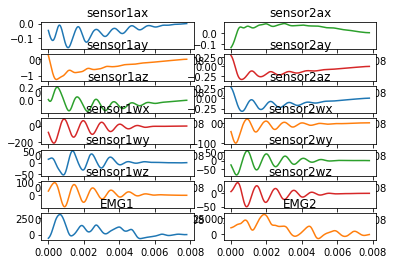

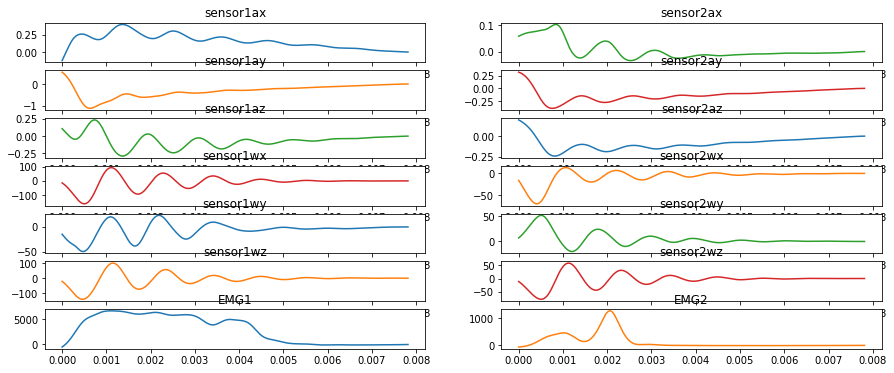

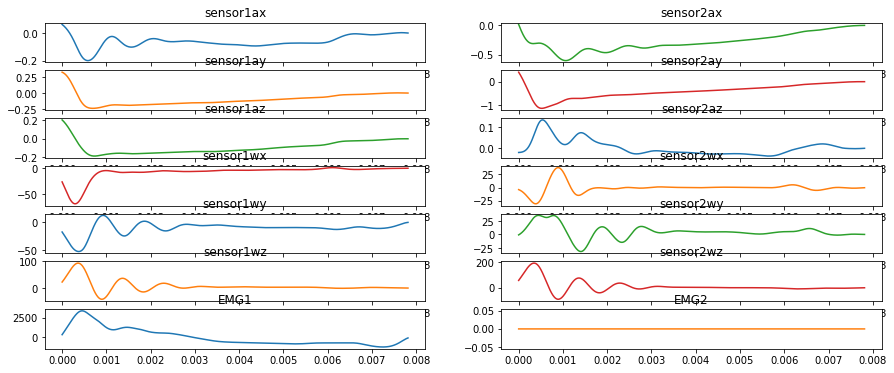

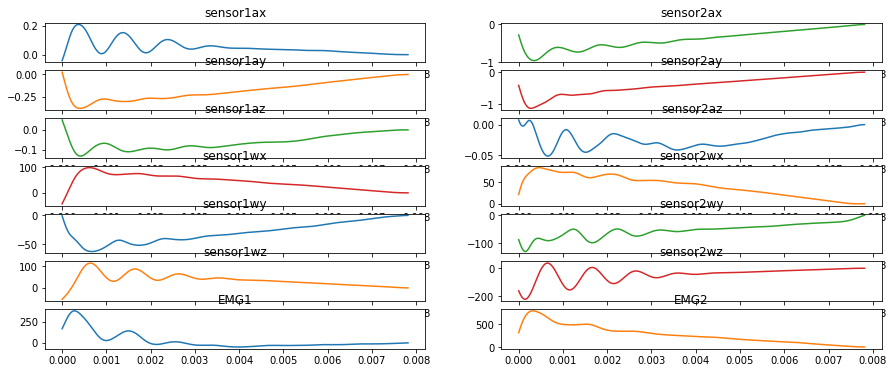

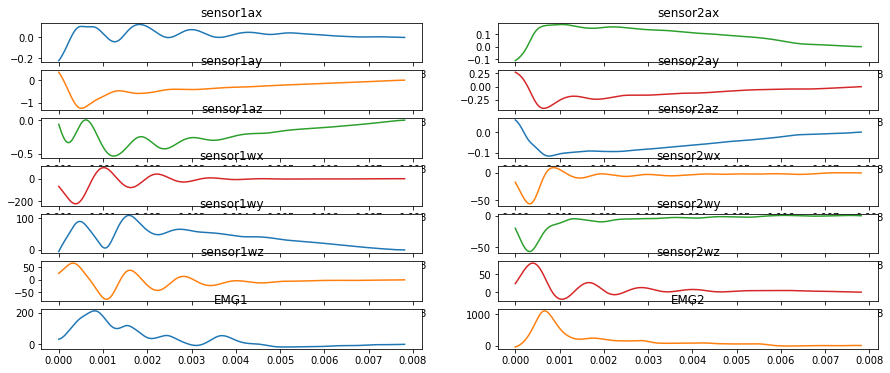

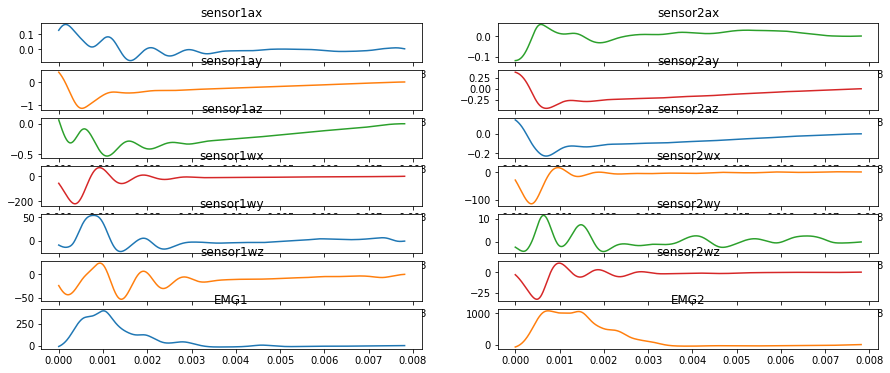

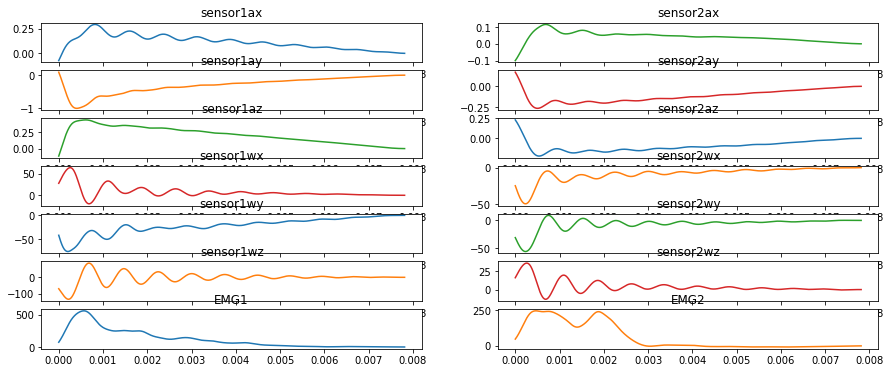

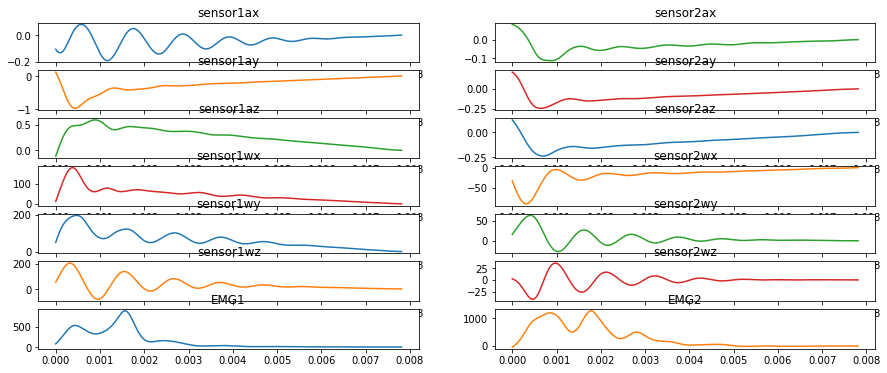

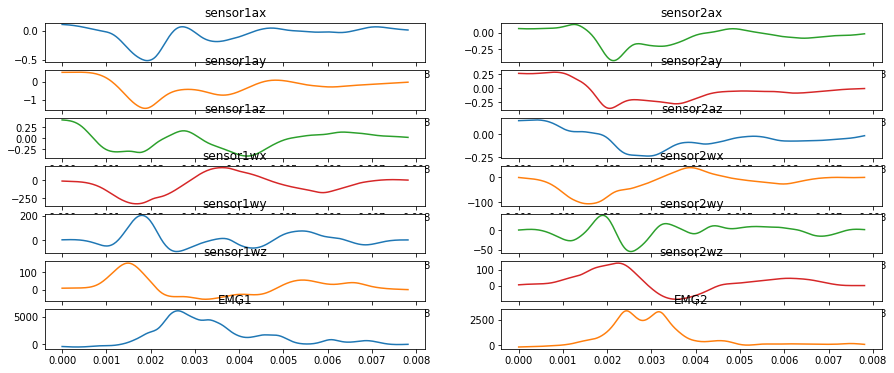

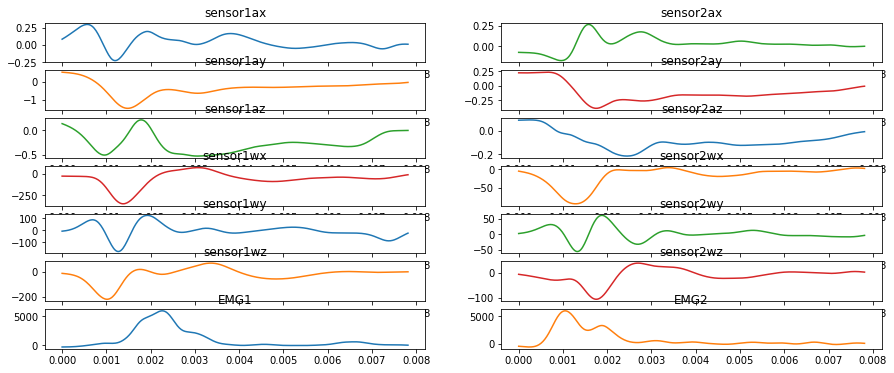

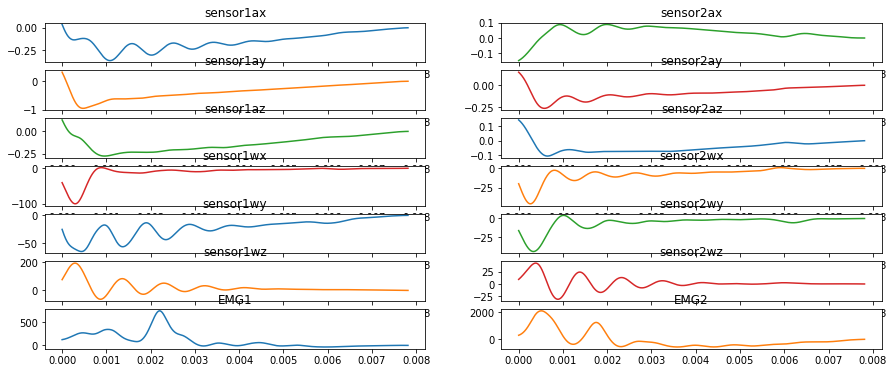

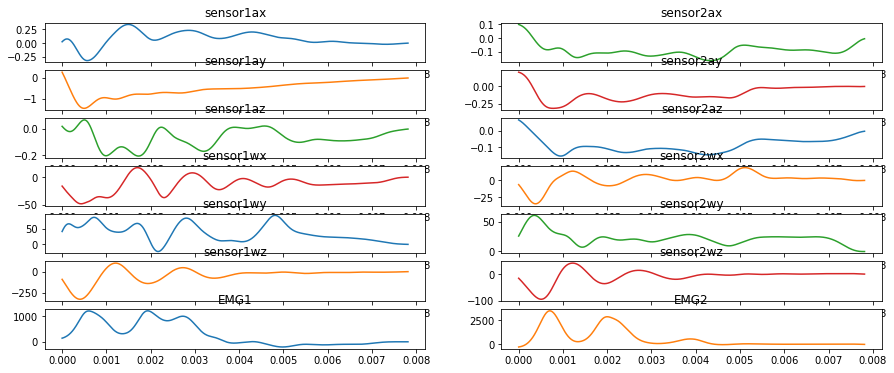

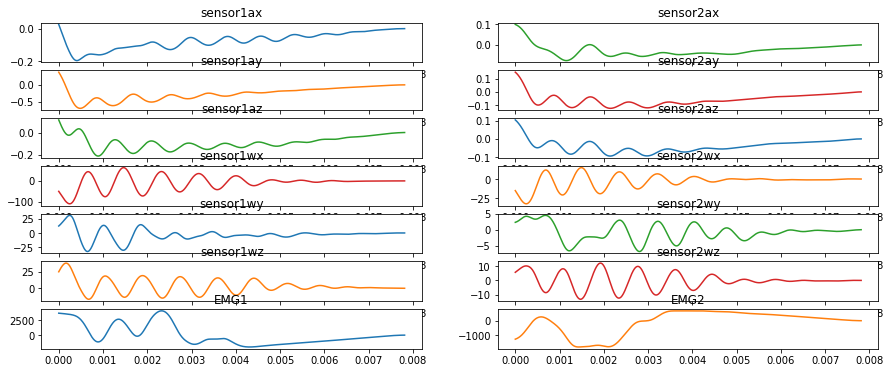

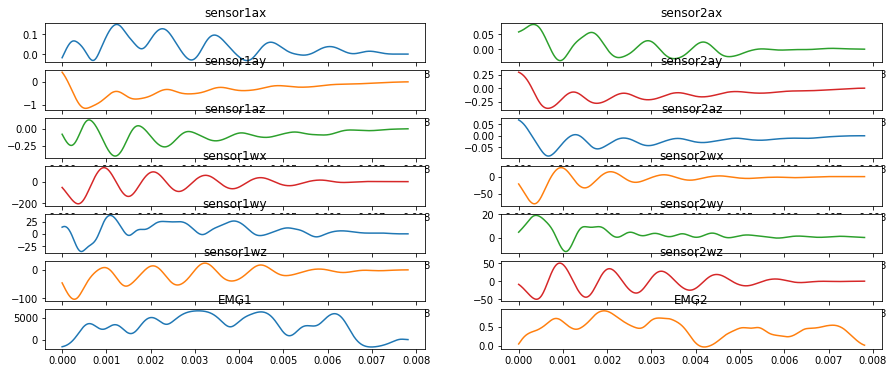

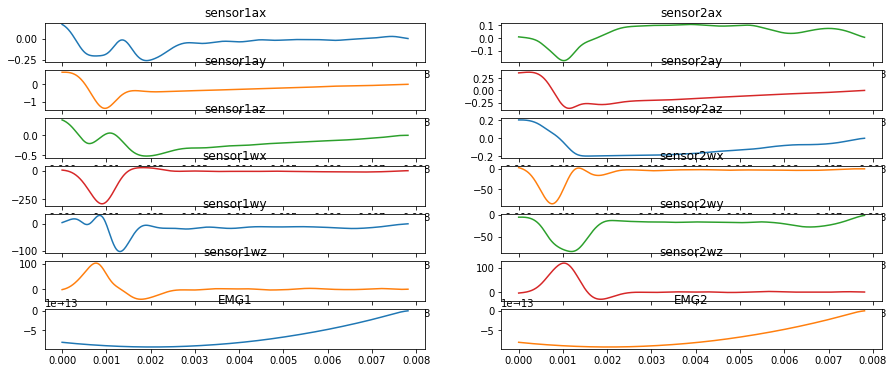

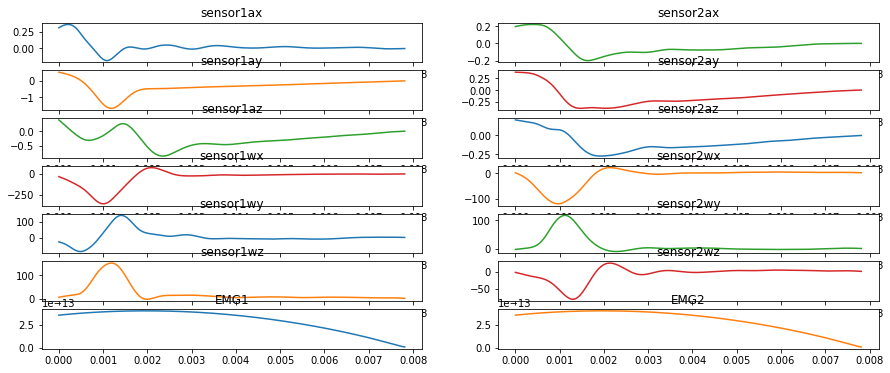

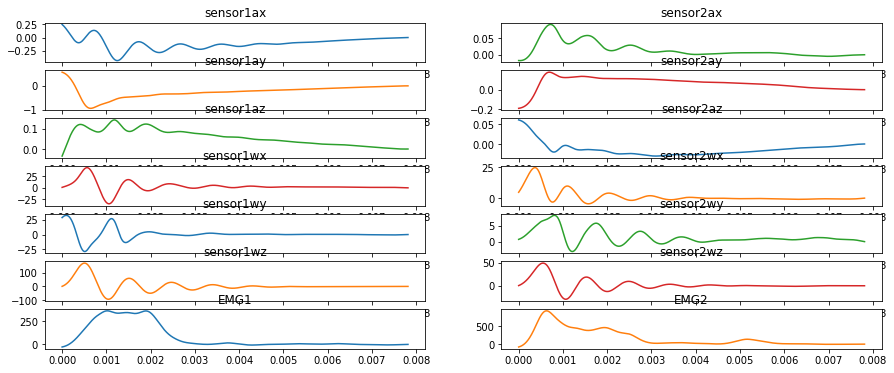

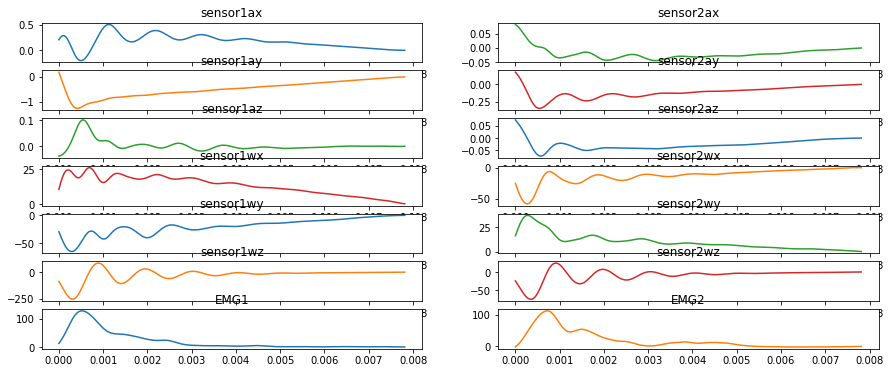

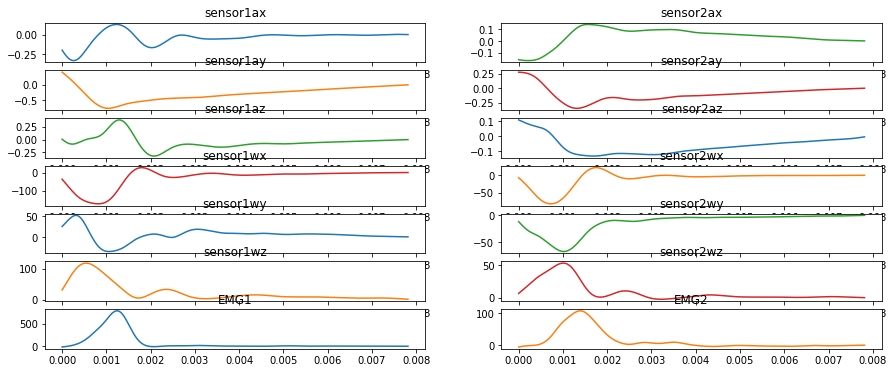

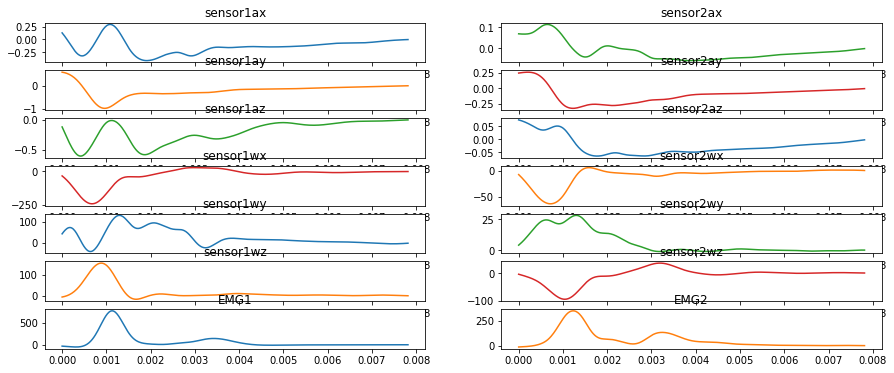

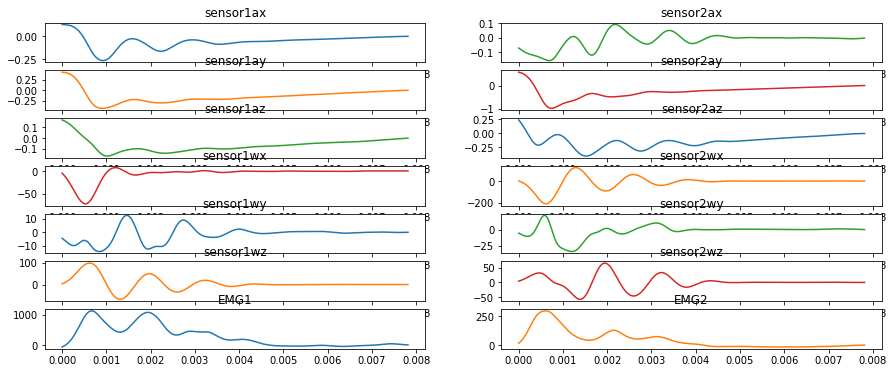

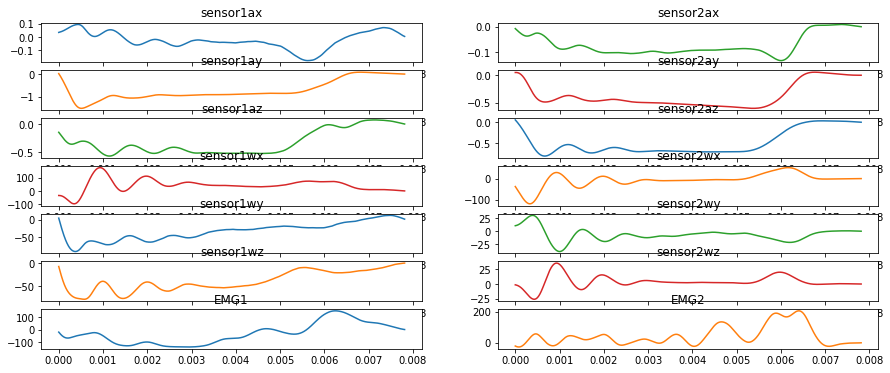

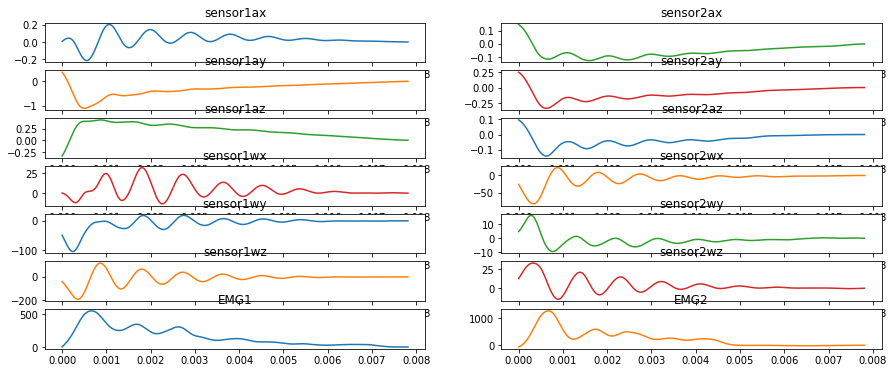

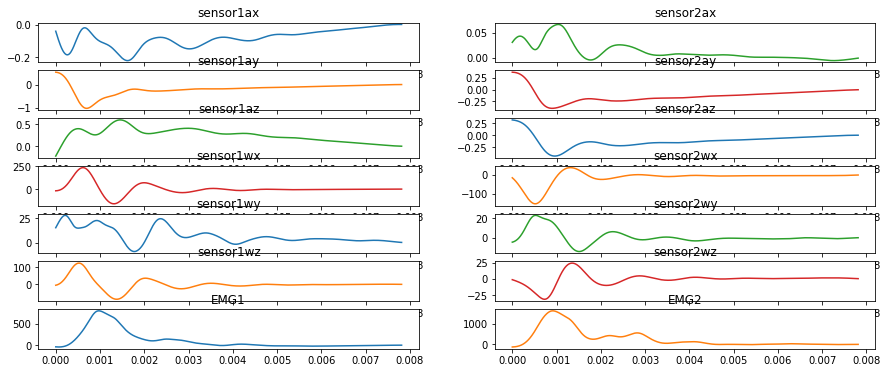

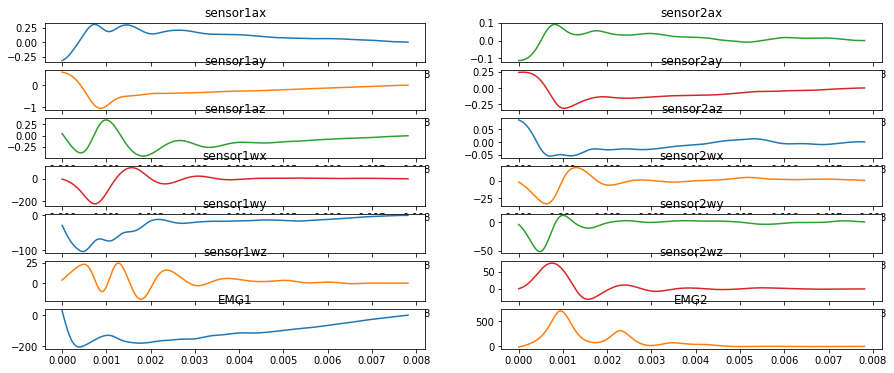

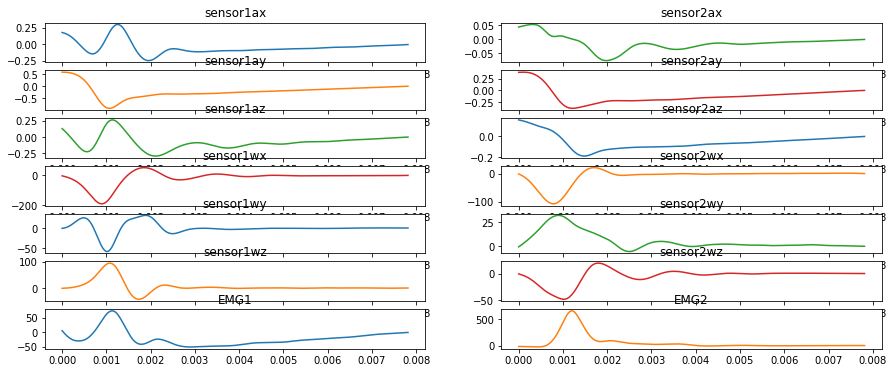

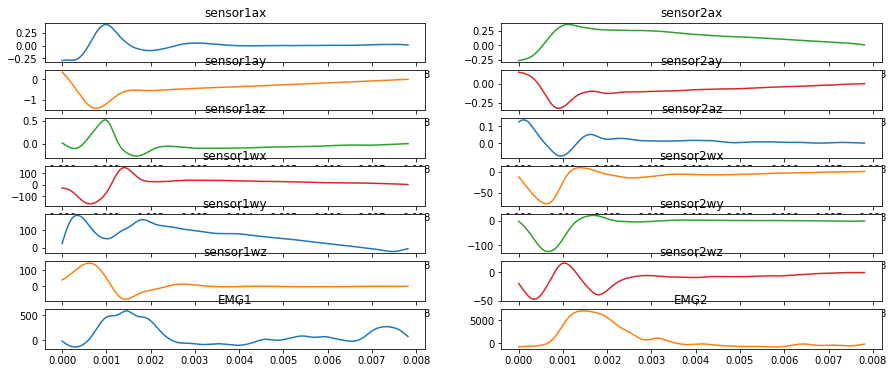

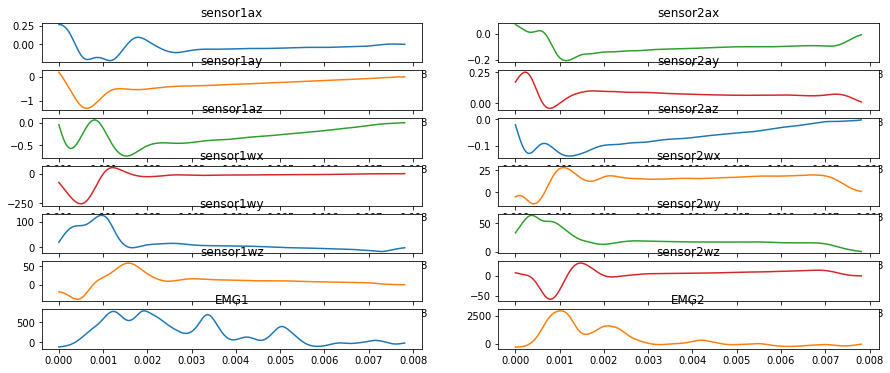

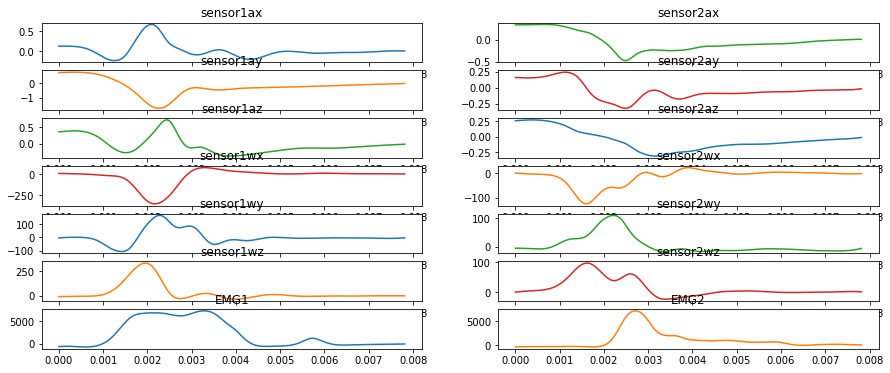

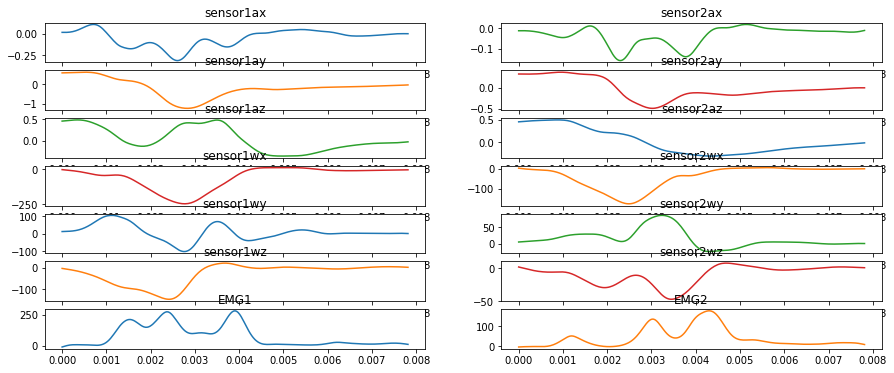

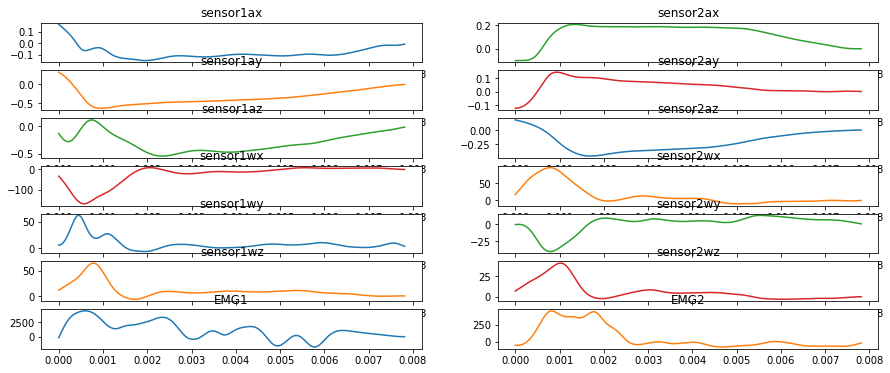

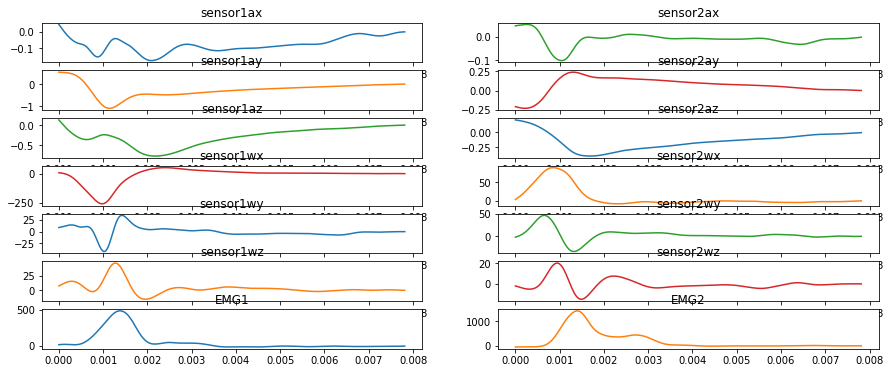

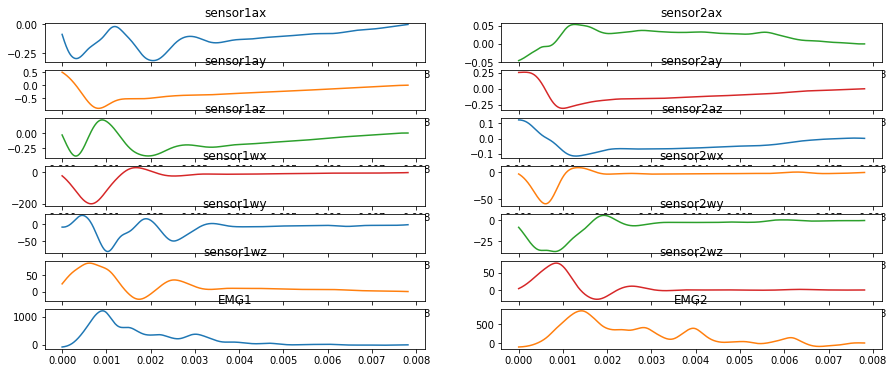

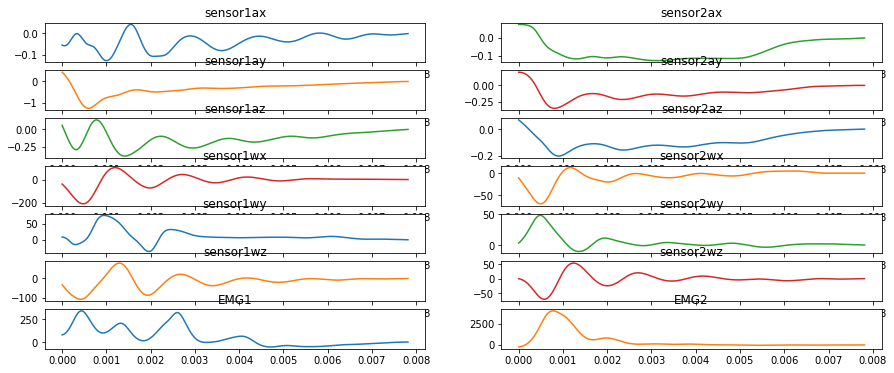

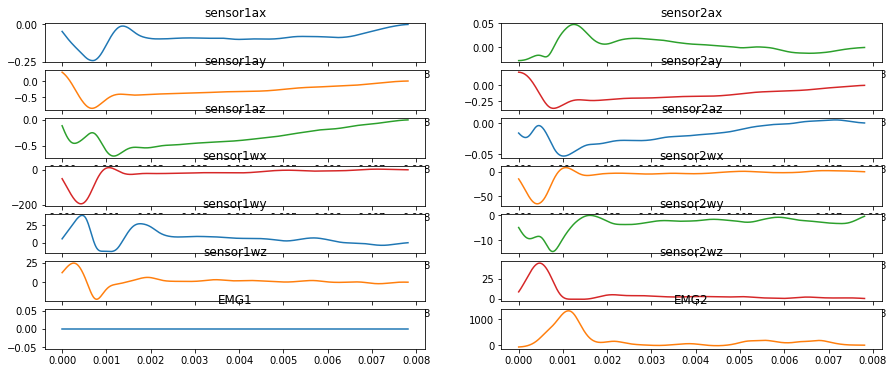

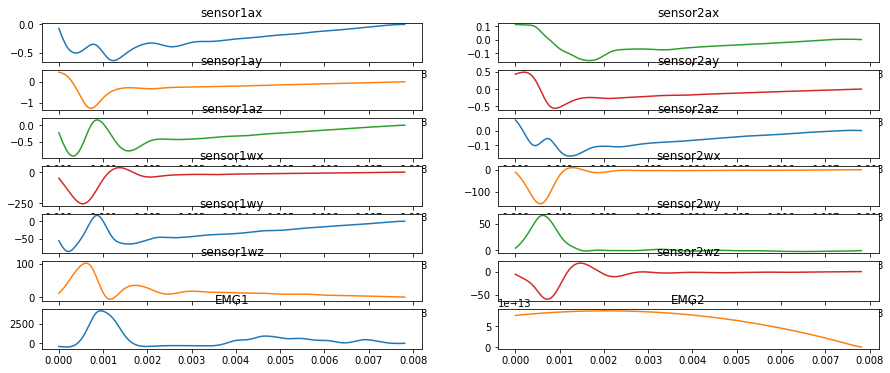

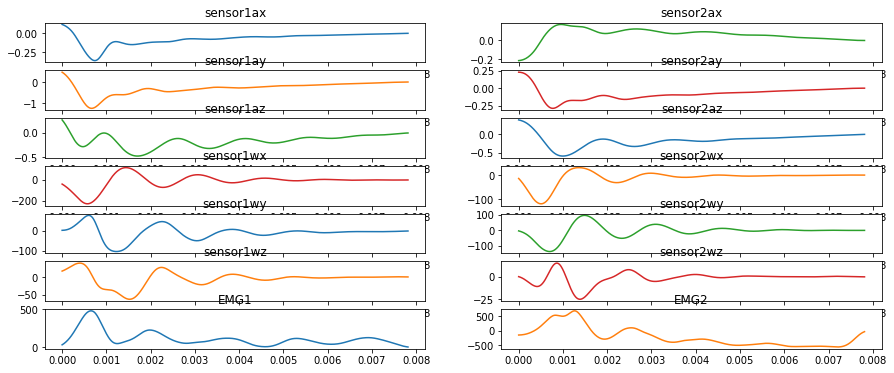

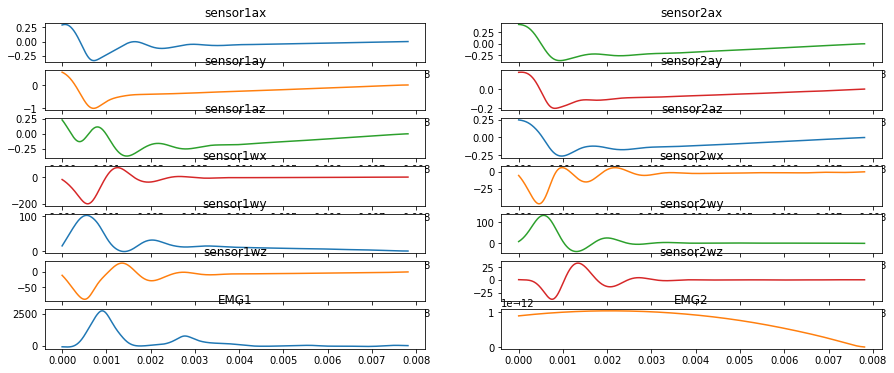

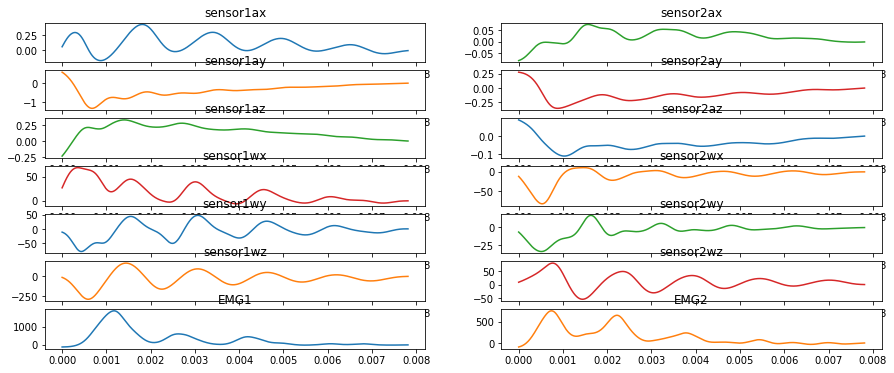

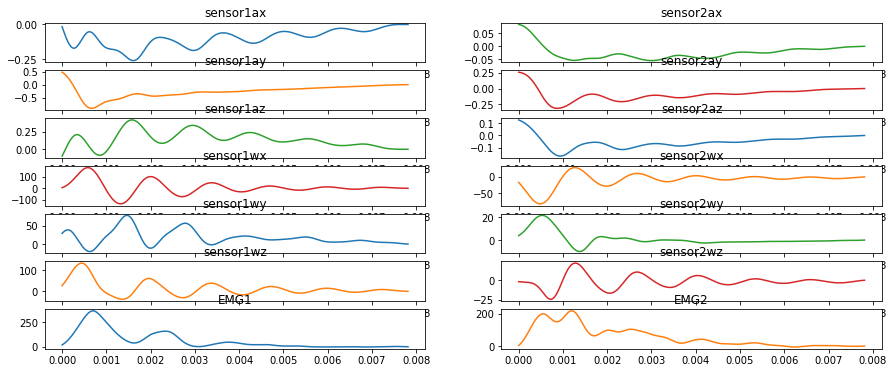

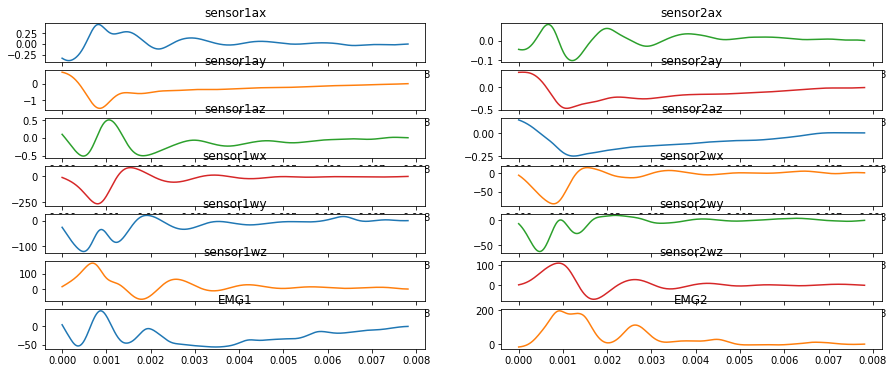

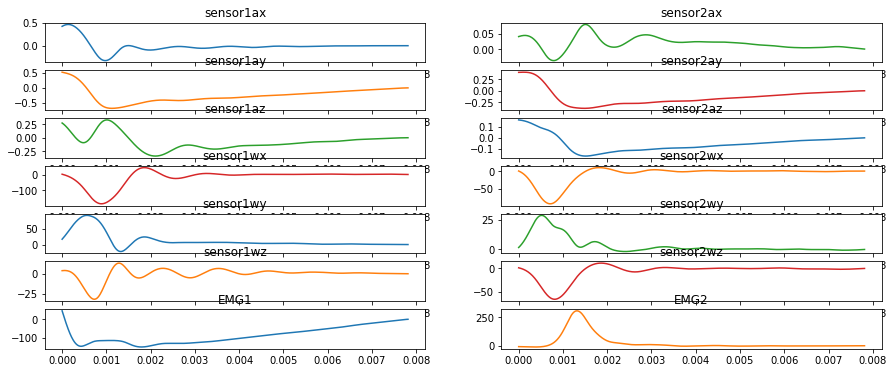

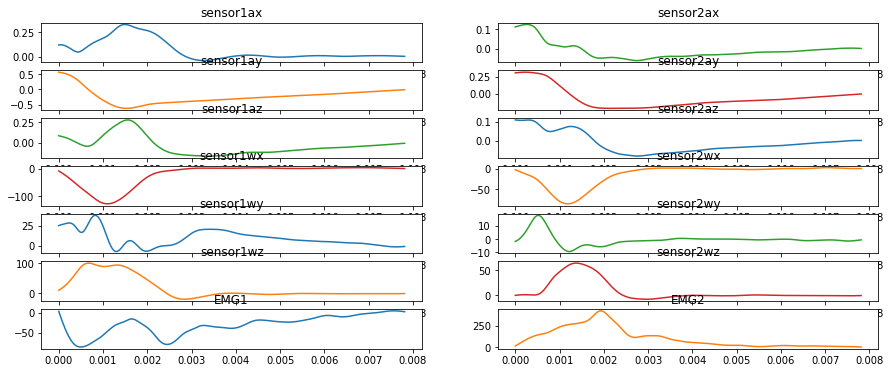

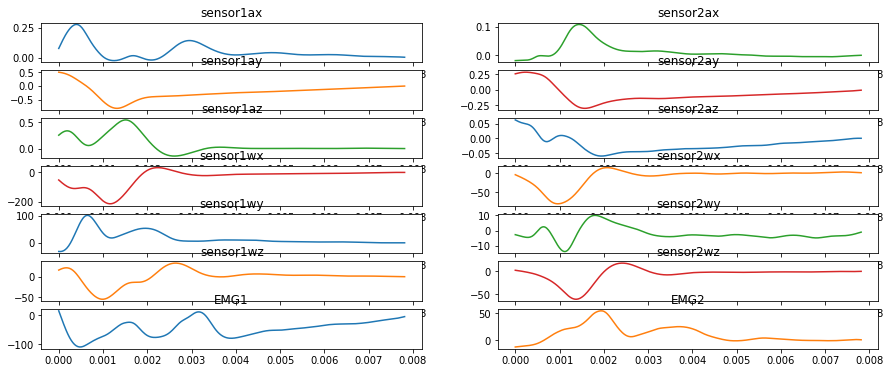

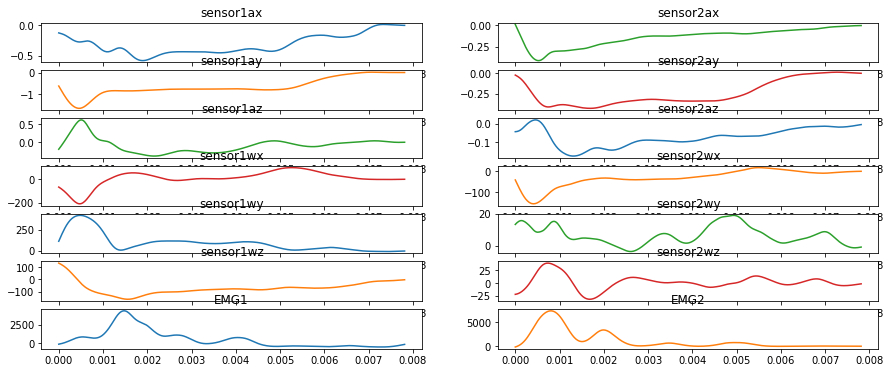

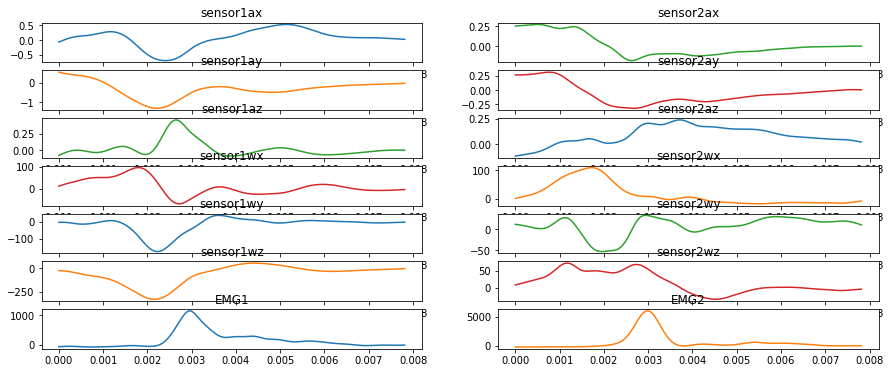

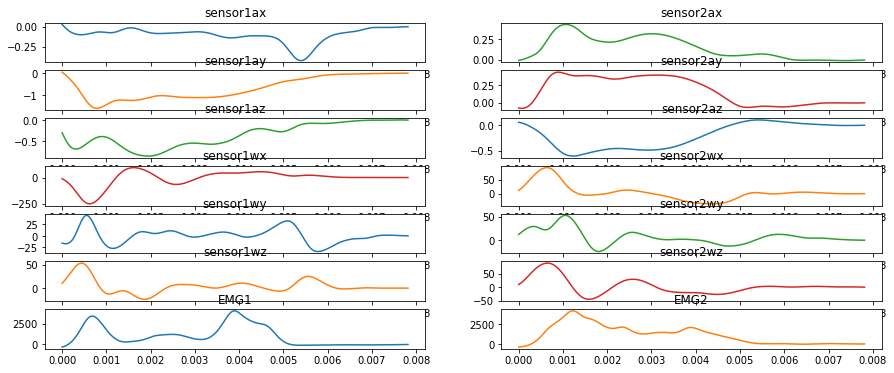

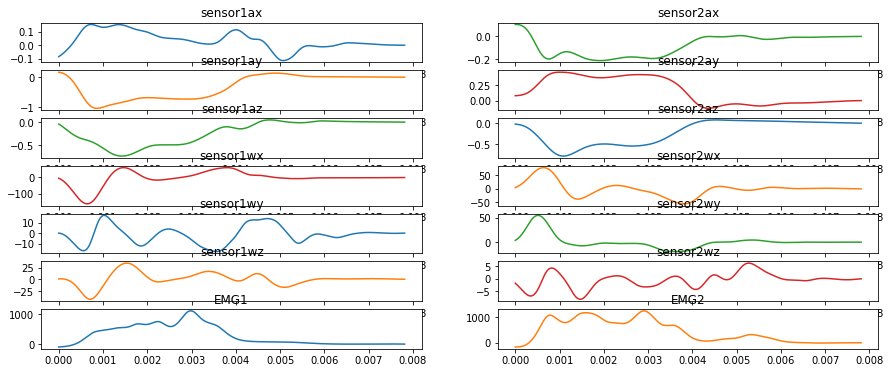

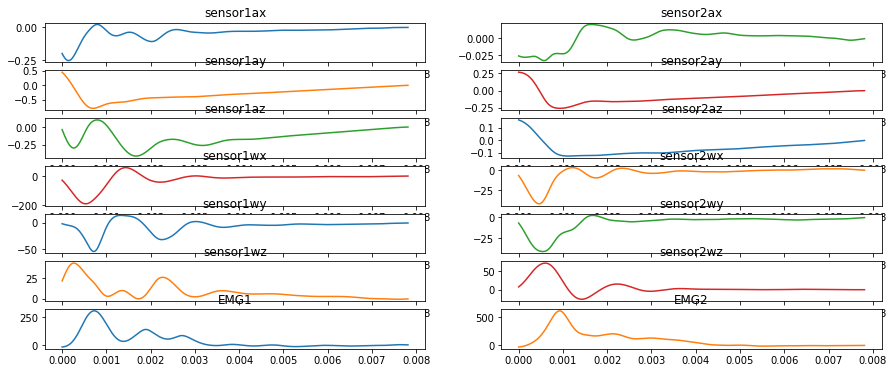

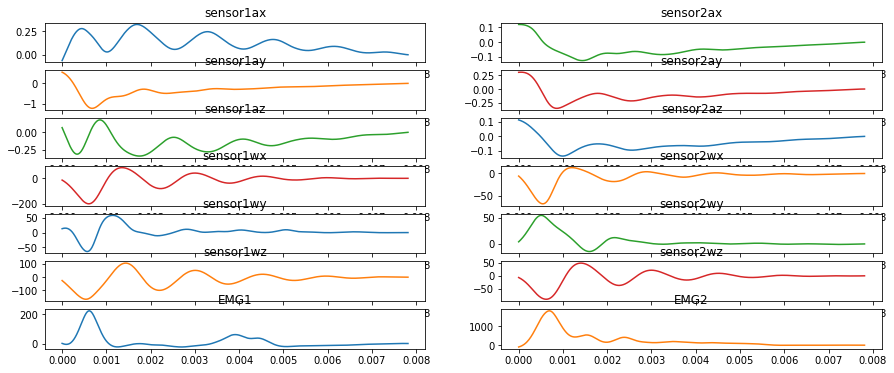

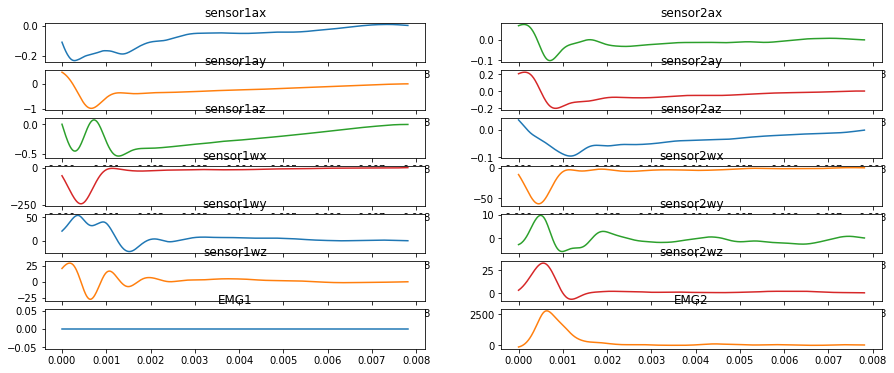

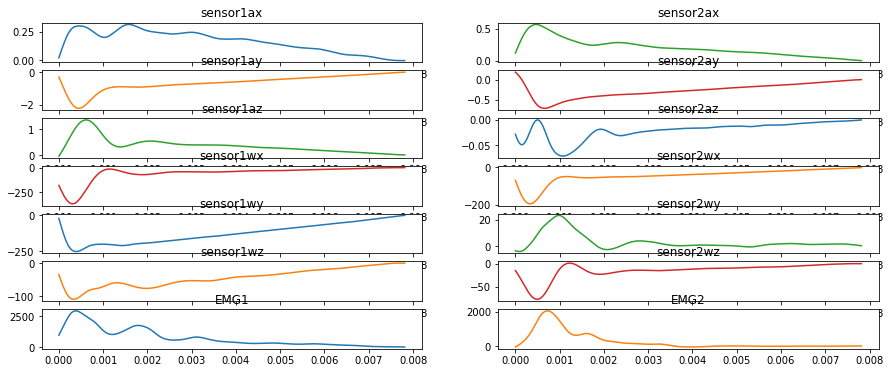

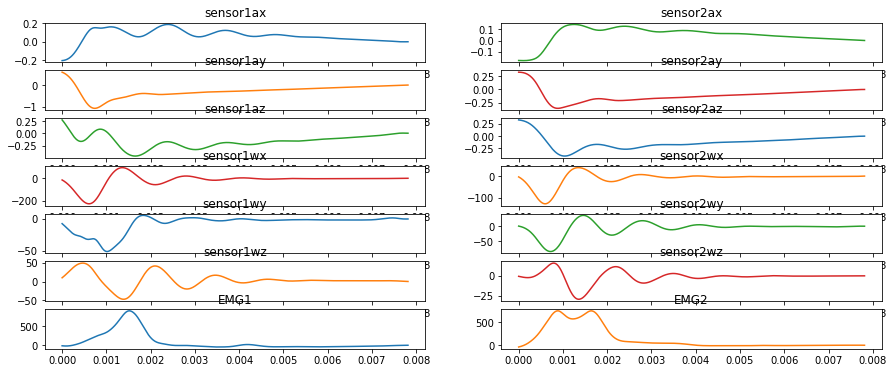

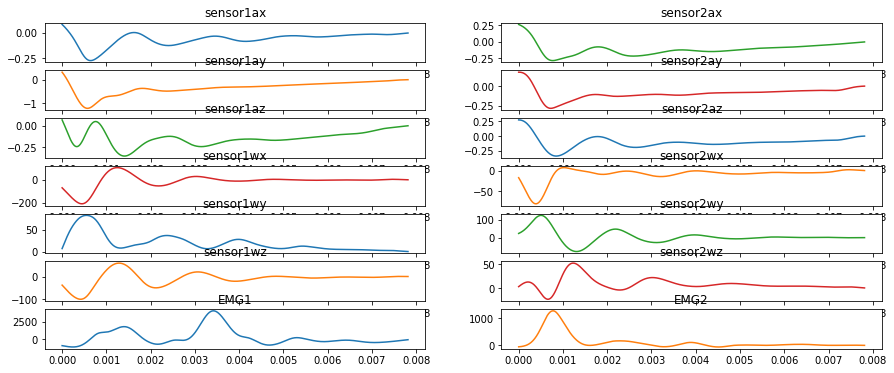

In [ ]:
""""in previous work I found the initializing point by finding the first peak of each signal
as max value of the signal, but in this report I used Ahmad's Method which was finding the initializing point
manually for each signal  """
# Folder Path
path = "/content/drive/MyDrive/all_data"
# Change the directory
#os.chdir(path)
#os.listdir()
L = ["N","PA","PB"]
d = ["L","R"]
file_list = []

for j in ["N","PA","PB"]:
  file_path = f"{path}/{j}"
  for i in range(1,11):
    file_path = f"{path}/{j}{i}"
    for m in ["L","R"]:
      file_path = f"{path}/{j}{i}_{m}.csv"
      file_list = file_list+ [file_path]
file_list.remove("/content/drive/MyDrive/all_data/PB1_R.csv")
file_list.remove('/content/drive/MyDrive/all_data/PB1_L.csv')
file_list.remove('/content/drive/MyDrive/all_data/PB3_L.csv')
file_list.remove('/content/drive/MyDrive/all_data/PB3_R.csv')
file_list.remove('/content/drive/MyDrive/all_data/PA3_R.csv')
file_list.remove('/content/drive/MyDrive/all_data/PA3_L.csv')
#print(file_list)
# print(file_list)
for file_path in file_list:
    data = pd.read_csv(file_path)
    last_empty_row=len(data)
    y = np.linspace(0,0.0078125,last_empty_row)
    def bandPassFilter(signal):
        fs = last_empty_row
        lowcut = 0.1
        """ based on Ahmad thesis "The cutoff frequency is chosen to be 8 Hz for data sets from squeeze bulb (Chapters 3),
pendulum (Chapter 4), and glass rod (Chapter 5) experimental setups. This filter has a fairly sharp
attenuation without excessive distortion in the magnitude of nearby frequencies. We evaluated
butterworth, Bessel, and elliptic low-pass filters, and found the fourth order butterworth filter
to be the most effective on all data sets (Figure 2.4). Equation (2.1) shows the filter frequency
response. Parkinson’s tremor usually occurs at 2–6 Hz, and the input signals occur at around
0.25–1 Hz.
" but based on other human movement studies the cut off frequency should be 30HZ
I believe for domain series analysis we can use 8HZ but for frequency domain we better use a higjer frequency such as 30HZ
to protect information hidden in higher frequencies"""
        highcut = 8
        nyq = 0.5*fs
        low = lowcut/nyq
        high = highcut/nyq

        order = 2
        b, a = scipy.signal.butter(order, [low,high], "bandpass",analog = False)
        y = scipy.signal.filtfilt(b,a, signal, axis= 0)
        return(y)
    sensor1ax= bandPassFilter(data.iloc[:,1].values)
    sensor1ay= bandPassFilter(data.iloc[:,2].values)
    sensor1az= bandPassFilter(data.iloc[:,3].values)
    sensor1wx= bandPassFilter(data.iloc[:,4].values)
    sensor1wy= bandPassFilter(data.iloc[:,5].values)
    sensor1wz= bandPassFilter(data.iloc[:,6].values)
    sensor2ax= bandPassFilter(data.iloc[:,7].values)
    sensor2ay= bandPassFilter(data.iloc[:,8].values)
    sensor2az= bandPassFilter(data.iloc[:,9].values)
    sensor2wx= bandPassFilter(data.iloc[:,10].values)
    sensor2wy= bandPassFilter(data.iloc[:,11].values)
    sensor2wz= bandPassFilter(data.iloc[:,12].values)
    EMG1= bandPassFilter(data.iloc[:,13].values)
    EMG2= bandPassFilter(data.iloc[:,14].values)
    print(file_path)
    fig, axs = plt.subplots(7, 2)

    axs[0, 0].plot(y, sensor1ax)
    axs[0, 0].set_title('sensor1ax')
    axs[1, 0].plot(y, sensor1ay, 'tab:orange')
    axs[1, 0].set_title('sensor1ay')
    axs[2, 0].plot(y, sensor1az, 'tab:green')
    axs[2, 0].set_title('sensor1az')
    axs[3, 0].plot(y, sensor1wx, 'tab:red')
    axs[3, 0].set_title('sensor1wx')
    axs[4, 0].plot(y, sensor1wy)
    axs[4, 0].set_title('sensor1wy')
    axs[5, 0].plot(y, sensor1wz, 'tab:orange')
    axs[5, 0].set_title('sensor1wz')
    axs[0, 1].plot(y, sensor2ax, 'tab:green')
    axs[0, 1].set_title('sensor2ax')
    axs[1, 1].plot(y, sensor2ay, 'tab:red')
    axs[1, 1].set_title('sensor2ay')
    axs[2, 1].plot(y, sensor2az)
    axs[2, 1].set_title('sensor2az')
    axs[3, 1].plot(y, sensor2wx, 'tab:orange')
    axs[3, 1].set_title('sensor2wx')
    axs[4, 1].plot(y, sensor2wy, 'tab:green')
    axs[4, 1].set_title('sensor2wy')
    axs[5, 1].plot(y, sensor2wz, 'tab:red')
    axs[5, 1].set_title('sensor2wz')
    axs[6, 0].plot(y, EMG1)
    axs[6, 0].set_title('EMG1')
    axs[6, 1].plot(y, EMG2, 'tab:orange')
    axs[6, 1].set_title('EMG2')
    plt.rcParams["figure.figsize"] = (15,6)

## Feature Extraction

In [ ]:
# all_features_list = []
# for m in range(60):
#   all_features_list = all_features_list + [m]
# all_features_list = pd.DataFrame(all_features_list)
# all_features_list = all_features_list.transpose()
# # print(all_features_list)
subjects = []

for j in ["N","PA","PB"]:
  for i in range(1,11):
    for m in ["L","R"]:
      file_name = f"{j}{i}_{m}"
      subjects = subjects+ [file_name]
subjects.remove("PB1_R")
subjects.remove('PB1_L')
subjects.remove('PB3_L')
subjects.remove('PB3_R')
subjects.remove('PA3_R')
subjects.remove('PA3_L')
subjects = ["subjects"] + subjects
# subjects = subjects.transpose()
subjects = pd.DataFrame(subjects)
# print(subjects)

PD_or_HC = []
for l in range(len(subjects)):
  if l <= 20 :
    PD_or_HC = PD_or_HC + [0]
  elif l > 20 and l <= 38:
    PD_or_HC = PD_or_HC + [1]
  else:
    PD_or_HC = PD_or_HC + [2]
PD_or_HC = pd.DataFrame(PD_or_HC)
# print(PD_or_HC)


# print(subjects)
# print(np.shape(subjects))


all_features_list = []
for i in [1,2]:
  for m in ["a","w"]:
    for n in ["x", "y", "z"]:
      for l in ["area", "max", "mean", "std", "variance", "max_freq", "max_cA", "max_cD"]:
          column_name = f"{i}{m}{n}{l}"
          all_features_list = all_features_list + [column_name]
# all_features_list =
all_features_list = pd.DataFrame(all_features_list)
all_features_list = all_features_list.transpose()
# print(all_features_list)
# print(np.shape(all_features_list))


for file_path in file_list:
    data = pd.read_csv(file_path)
    last_empty_row=len(data)
    y = np.linspace(0,0.0078125,last_empty_row)
    # print(file_path)
    mean_list = []
    variance_list = []
    area_under_curve_list = []
    max_list = []
    std_list = []
    features_list_each_subject = []
    # X = abs(bandPassFilter(data.iloc[:, 12].values))
    # for n in range(1,len(X)):
    #     max = X[0]
    #     if X[n] > max:
    #        max = X[n]
    for i in range(1, 13):
        X = abs(bandPassFilter(data.iloc[:, i].values))
        for m in range(1,len(X)):
            max = X[0]
            if X[m] > max:
               max = X[m]
        # max_list = max_list + [max]
        mean = statistics.mean(X)
        # mean_list = mean_list + [mean]
        std = statistics.stdev(X)
        # std_list = std_list + [std]
        variance = np.std(X)**2
        # variance_list = variance_list + [variance]
        area = trapz(X, dx=5)
        last_empty_row=len(data)
        frequency = np.linspace(0,0.0078125,last_empty_row)
        """for f_ratio = 1 we will have all frequencies but they are symetric in the start point and finish point
        so I changed it to f_ratio= 0.5 wich makes the f_band to half of the sampeling rate, then I noticed that
        most of the frequencies are in the one_fifth of the f_band so I used 0.1 as the final value for f_ratio"""

        f_ratio = 0.1
        num_f_bins = int(len(frequency)*f_ratio)
        f = fft(X)
        amp_f = np.abs(f)
        max_freq= np.max(amp_f)
        # plt.plot(frequency[:num_f_bins],amp_f[:num_f_bins])
        # plt.show()
        #cA = Approximation Coefficients, cD =Detail Coefficients
        cA, cD = pywt.dwt(X, 'db1')
        max_cA = np.max(cA)
        max_cD = np.max(cD)
        # print(file_path)
        # print(max_cA)
        # print(max_cD)
        features_list_each_subject = features_list_each_subject + [area]+ [max]+ [mean]+ [std]+ [variance]+ [max_freq]+ [max_cA]+ [max_cD]
    all_features_list.loc[len(all_features_list)] = features_list_each_subject
df = pd.DataFrame(all_features_list)

df.insert(0, "subjects", subjects[0], True)
df.insert(0, "PD_or_HC", PD_or_HC, True)
print(df)
# writer = pd.ExcelWriter(r"/content/drive/MyDrive/all_features.xlsx")
# df.to_excel(writer, sheet_name='all_features', index=False)
# writer.save()





    PD_or_HC  subjects           0         1         2         3            4  \
0          0  subjects     1axarea    1axmax   1axmean    1axstd  1axvariance   
1          0      N1_L  290.464729  0.046953  0.048633  0.039828     0.001585   
2          0      N1_R  827.514283  0.122987  0.159657  0.098904     0.009773   
3          0      N2_L  402.032941  0.062885  0.062744  0.040758      0.00166   
4          0      N2_R  307.395545  0.041196  0.050575  0.045772     0.002093   
5          0      N3_L  180.310386  0.220936  0.040147   0.03775     0.001423   
6          0      N3_R  132.407624  0.126234  0.025673  0.034972     0.001222   
7          0      N4_L  944.312415  0.073904  0.116103  0.070256     0.004933   
8          0      N4_R  263.107028  0.105872  0.049367  0.043902     0.001926   
9          0      N5_L  146.179291  0.103515  0.099295  0.128152     0.016367   
10         0      N5_R  148.485887   0.08307  0.083082  0.075487     0.005682   
11         0      N6_L  865.

In [ ]:
Damping_ratio_Normal_left_arm = [0.0913, 0.1198, 0.1825, 0.1646, 0.1563, 0.0989, 0.0701, 0.2419, 0.1285, 0.4577]
Damping_ratio_Normal_right_arm = [0.0837, 0.1444, 0.1206, 0.1167, 0.2664, 0.1543, 0.0951, 0.3953, 0.1395, 0.3956]
Damping_ratio_Normal_left_right_arm = [0.0913, 0.0837, 0.1198, 0.1444, 0.1825, 0.1206, 0.1646, 0.1167, 0.1563, 0.2664,
                                       0.0989, 0.1543, 0.0701, 0.0951, 0.2419, 0.3953, 0.1285, 0.1395, 0.4577, 0.3956]

Damping_ratio_PDoffmed_left_arm = [0.1510, 0.0763, 0.1808, 0.1574, 0.5326, 0.3784, 0.3501,0.3621,0.2912]
Damping_ratio_PDoffmed_right_arm = [0.2414, 0.1582, 0.4756, 0.1545, 0.2843, 0.1603, 0.3194, 0.3462, 0.3808 ]
Damping_ratio_PDoffmed_left_right_arm = [0.1510, 0.2414, 0.0763, 0.1582, 0.1808, 0.4756, 0.1574, 0.1545,0.5326,
                                         0.2843, 0.3784, 0.1603, 0.3501, 0.3194,0.3621, 0.3462,0.2912, 0.3808]

Damping_ratio_PDonmed_left_arm = [0.0706, 0.5045, 0.2737, 0.2563, 0.2450, 0.3336, 0.2209, 0.3805]
Damping_ratio_PDonmed_right_arm =[0.0318, 0.0175, 0.2172, 0.2154, 0.1193, 0.0294, 0.2030, 0.2193]
Damping_ratio_PDonmed_left_right_arm = [0.0706, 0.0318, 0.5045, 0.0175, 0.2737, 0.2172, 0.2563, 0.2154,
                                        0.2450, 0.1193, 0.3336, 0.0294, 0.2209, 0.2030,0.3805, 0.2193]

Damping_ratio_all_subjects = [0.0913, 0.0837, 0.1198, 0.1444, 0.1825,0.1206, 0.1646, 0.1167, 0.1563, 0.2664, 0.0989, 0.1543, 0.0701, 0.0951, 0.2419,
                              0.3953, 0.1285, 0.1395, 0.4577, 0.3956, 0.1510, 0.2414, 0.0763, 0.1582, 0.1808, 0.4756, 0.1574, 0.1545, 0.5326, 0.2843,
                              0.3784, 0.1603, 0.3501, 0.3194,0.3621, 0.3462,0.2912, 0.3808,0.0706, 0.0318, 0.5045, 0.0175, 0.2737, 0.2172, 0.2563, 0.2154,
                              0.2450, 0.1193, 0.3336, 0.0294, 0.2209, 0.2030, 0.3805, 0.2193]
"""all of them were right handed"""
Handed = [0,1, 0,1, 0,1, 0,1, 0,1, 0,1 ,0,1, 0,1, 0,1]
Damping_ratio_all_subjects = ["Damping_ratio_all_subjects"] + Damping_ratio_all_subjects


In [ ]:
Damping_ratio_all_subjects = pd.DataFrame(Damping_ratio_all_subjects)

df.insert(98, "Damping_Ratio", Damping_ratio_all_subjects[0], True)
# df = df.iloc[1:, :]
# df.remove("PB1_R")
print(df)
# writer = pd.ExcelWriter(r"/content/drive/MyDrive/Extracted_Features.xlsx")
# df.to_excel(writer, sheet_name='all_features', index=False)
# writer.save()

    PD_or_HC  subjects           0         1         2         3            4  \
0          0  subjects     1axarea    1axmax   1axmean    1axstd  1axvariance   
1          0      N1_L  290.464729  0.046953  0.048633  0.039828     0.001585   
2          0      N1_R  827.514283  0.122987  0.159657  0.098904     0.009773   
3          0      N2_L  402.032941  0.062885  0.062744  0.040758      0.00166   
4          0      N2_R  307.395545  0.041196  0.050575  0.045772     0.002093   
5          0      N3_L  180.310386  0.220936  0.040147   0.03775     0.001423   
6          0      N3_R  132.407624  0.126234  0.025673  0.034972     0.001222   
7          0      N4_L  944.312415  0.073904  0.116103  0.070256     0.004933   
8          0      N4_R  263.107028  0.105872  0.049367  0.043902     0.001926   
9          0      N5_L  146.179291  0.103515  0.099295  0.128152     0.016367   
10         0      N5_R  148.485887   0.08307  0.083082  0.075487     0.005682   
11         0      N6_L  865.

To have a clear underestanding of each feature

2


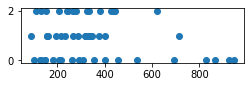

3


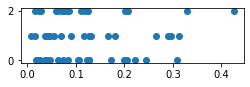

4


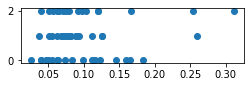

5


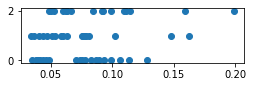

6


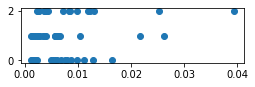

7


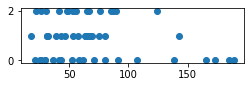

8


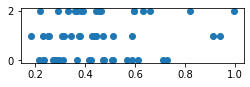

9


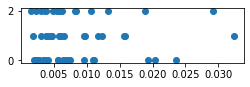

10


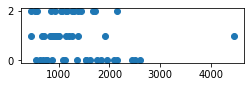

11


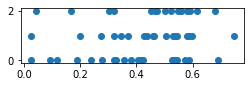

12


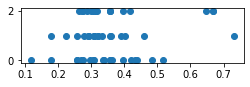

13


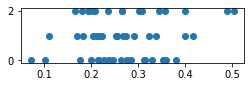

14


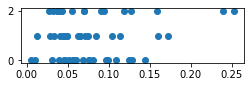

15


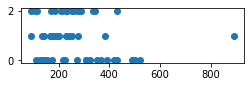

16


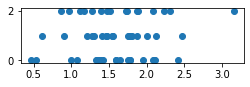

17


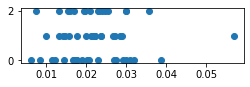

18


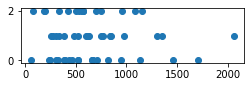

19


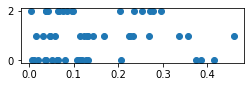

20


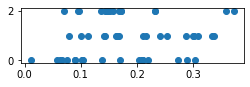

21


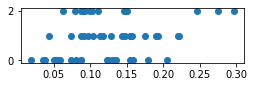

22


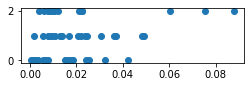

23


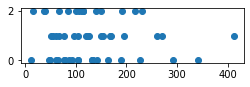

24


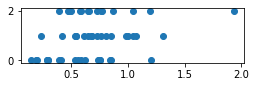

25


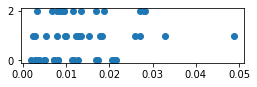

26


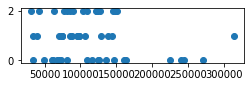

27


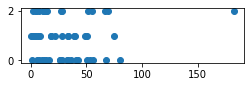

28


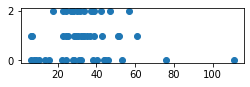

29


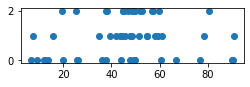

30


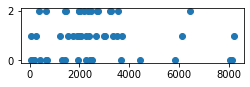

31


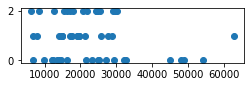

32


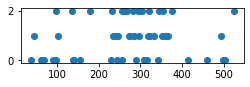

33


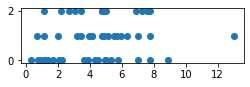

34


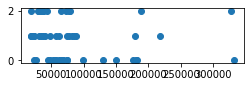

35


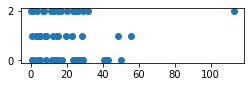

36


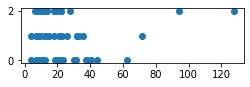

37


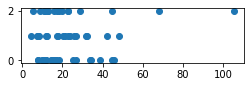

38


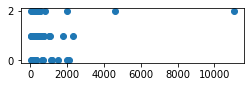

39


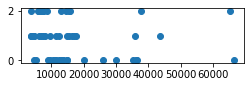

40


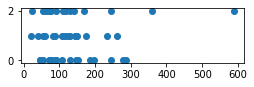

41


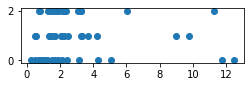

42


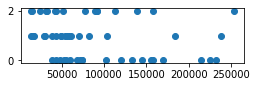

43


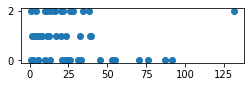

44


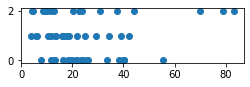

45


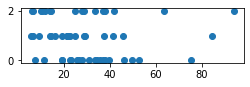

46


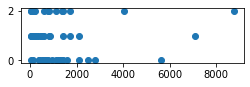

47


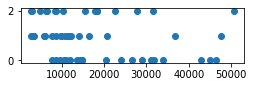

48


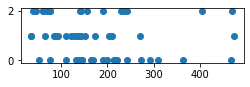

49


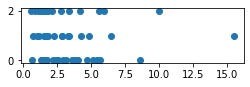

50


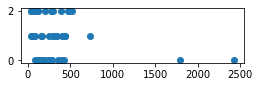

51


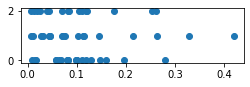

52


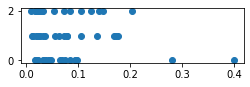

53


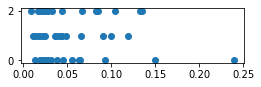

54


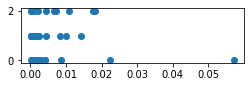

55


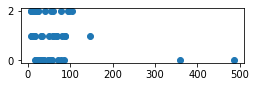

56


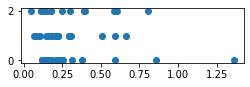

57


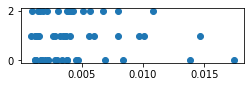

58


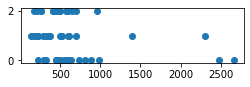

59


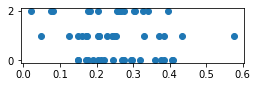

60


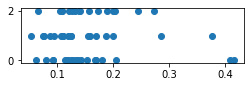

61


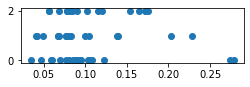

62


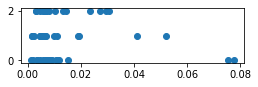

63


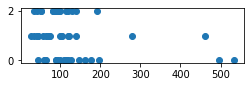

64


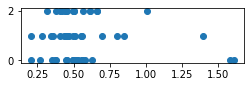

65


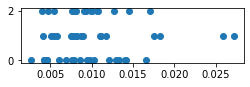

66


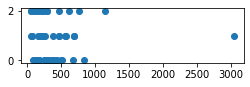

67


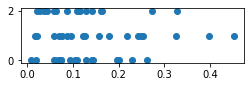

68


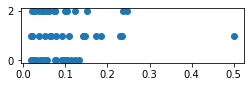

69


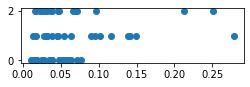

70


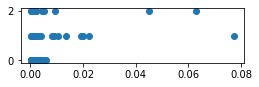

71


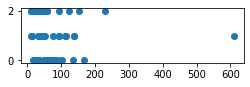

72


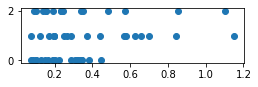

73


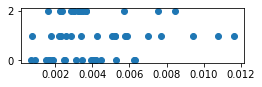

74


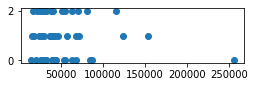

75


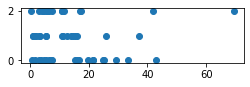

76


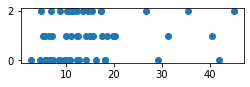

77


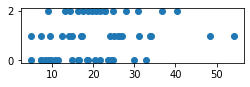

78


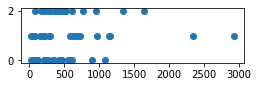

79


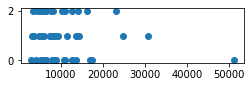

80


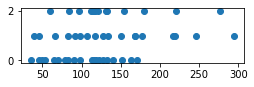

81


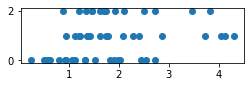

82


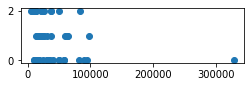

83


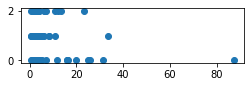

84


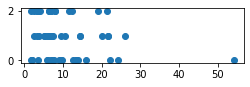

85


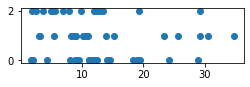

86


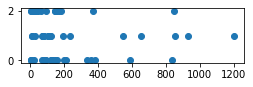

87


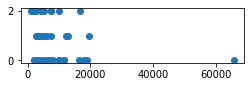

88


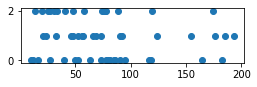

89


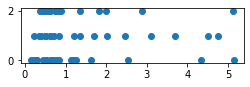

90


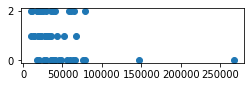

91


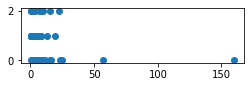

92


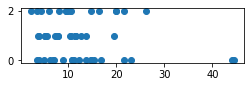

93


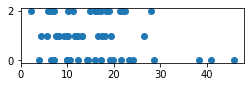

94


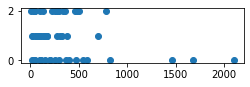

In [ ]:
# Importing the dataset
dataset = pd.read_csv('/content/drive/MyDrive/Extracted_Features.csv')
# print(dataset)
for f in range(2,95):
    X = dataset.iloc[:, f].values
    y = dataset.iloc[:, 0].values
    print(f)
    f = plt.figure()
    f.set_figwidth(4)
    f.set_figheight(1)
    plt.scatter(X, y)
    plt.show()

## Machine Learning

Classification of PD and HC participants

With all features


In [ ]:
sc_X = StandardScaler()
sc_y = StandardScaler()
X = sc_X.fit_transform(X)

#LOGISTICREGRESSION

#rbfSVM Classification

#DecisionTree Classification

# RandomForestClassifier

#KNN

#Naive_Bayes

In [ ]:
# Importing the dataset
dataset = pd.read_csv('/content/drive/MyDrive/Extracted_Features.csv')
# print(dataset)
"""with all sensors"""
# X = dataset.iloc[:38, 2:].values
"""with only wrist sensors"""
# X = dataset.iloc[:38, 50:98].values
"""with only wristwx sensors"""
# X = dataset.iloc[:38, 74:82].values
"""with only wristwy sensors"""
X = dataset.iloc[:38, 82:90].values
"""with only wristwz sensors"""
# X = dataset.iloc[:38, 90:98].values
y = dataset.iloc[:38, 0].values

sc_X = StandardScaler()
sc_y = StandardScaler()
X = sc_X.fit_transform(X)

#LOGISTICREGRESSION
print("LogisticRegression")
classifier_L_R = LogisticRegression()
# evaluate model
scores_accuracy = cross_val_score(classifier_L_R, X, y, scoring='accuracy', cv=5, n_jobs=-1)
# print(classification_report())
print(scores_accuracy)
# report performance
print('Accuracy: %.3f (%.3f)' % (mean(scores_accuracy), std(scores_accuracy)))
scores_precision = cross_val_score(classifier_L_R, X, y, scoring='precision', cv=5, n_jobs=-1)
print('precision: %.3f (%.3f)' % (mean(scores_precision), std(scores_precision)))
scores_recall = cross_val_score(classifier_L_R, X, y, scoring='recall', cv=5, n_jobs=-1)
print('recall: %.3f (%.3f)' % (mean(scores_recall), std(scores_recall)))
scores_f1 = cross_val_score(classifier_L_R, X, y, scoring='f1', cv=5, n_jobs=-1)
print('f1: %.3f (%.3f)' % (mean(scores_f1), std(scores_f1)))


#rbfSVM Classification
print("_______________________________")
print("rbfSVM")
classifier_SVC = SVC(kernel = "rbf")
# evaluate model
scores = cross_val_score(classifier_SVC, X, y, scoring='accuracy', cv=5, n_jobs=-1)
print(scores)
# report performance
print('Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))
scores_precision = cross_val_score(classifier_SVC, X, y, scoring='precision', cv=5, n_jobs=-1)
print('precision: %.3f (%.3f)' % (mean(scores_precision), std(scores_precision)))
scores_recall = cross_val_score(classifier_SVC, X, y, scoring='recall', cv=5, n_jobs=-1)
print('recall: %.3f (%.3f)' % (mean(scores_recall), std(scores_recall)))
scores_f1 = cross_val_score(classifier_SVC, X, y, scoring='f1', cv=5, n_jobs=-1)
print('f1: %.3f (%.3f)' % (mean(scores_f1), std(scores_f1)))



#DecisionTree Classification
print("_______________________________")
print("DecisionTree Classification")
classifier_DT = DecisionTreeClassifier(criterion = "entropy")
# evaluate model
scores = cross_val_score(classifier_DT, X, y, scoring='accuracy', cv=5, n_jobs=-1)
print(scores)
# report performance
print('Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))
scores_precision = cross_val_score(classifier_DT, X, y, scoring='precision', cv=5, n_jobs=-1)
print('precision: %.3f (%.3f)' % (mean(scores_precision), std(scores_precision)))
scores_recall = cross_val_score(classifier_DT, X, y, scoring='recall', cv=5, n_jobs=-1)
print('recall: %.3f (%.3f)' % (mean(scores_recall), std(scores_recall)))
scores_f1 = cross_val_score(classifier_DT, X, y, scoring='f1', cv=5, n_jobs=-1)
print('f1: %.3f (%.3f)' % (mean(scores_f1), std(scores_f1)))



# RandomForestClassifier
print("_______________________________")
print("RandomForestClassifier")
classifier_RF = RandomForestClassifier(n_estimators=100, criterion = "entropy")
# evaluate model
scores = cross_val_score(classifier_RF, X, y, scoring='accuracy', cv=5, n_jobs=-1)
print(scores)
# report performance
print('Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))
scores_precision = cross_val_score(classifier_RF, X, y, scoring='precision', cv=5, n_jobs=-1)
print('precision: %.3f (%.3f)' % (mean(scores_precision), std(scores_precision)))
scores_recall = cross_val_score(classifier_RF, X, y, scoring='recall', cv=5, n_jobs=-1)
print('recall: %.3f (%.3f)' % (mean(scores_recall), std(scores_recall)))
scores_f1 = cross_val_score(classifier_RF, X, y, scoring='f1', cv=5, n_jobs=-1)
print('f1: %.3f (%.3f)' % (mean(scores_f1), std(scores_f1)))



#KNN
print("_______________________________")
print("KNN")
classifier_KNN = KNeighborsClassifier()
# evaluate model
scores = cross_val_score(classifier_KNN, X, y, scoring='accuracy', cv=5, n_jobs=-1)
print(scores)
# report performance
print('Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))
scores_precision = cross_val_score(classifier_KNN, X, y, scoring='precision', cv=5, n_jobs=-1)
print('precision: %.3f (%.3f)' % (mean(scores_precision), std(scores_precision)))
scores_recall = cross_val_score(classifier_KNN, X, y, scoring='recall', cv=5, n_jobs=-1)
print('recall: %.3f (%.3f)' % (mean(scores_recall), std(scores_recall)))
scores_f1 = cross_val_score(classifier_KNN, X, y, scoring='f1', cv=5, n_jobs=-1)
print('f1: %.3f (%.3f)' % (mean(scores_f1), std(scores_f1)))



#Naive_Bayes
print("_______________________________")
classifier_N_B = GaussianNB()
# evaluate model
scores = cross_val_score(classifier_N_B, X, y, scoring='accuracy', cv=5, n_jobs=-1)
print(scores)
# report performance
print('Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))
scores_precision = cross_val_score(classifier_N_B, X, y, scoring='precision', cv=5, n_jobs=-1)
print('precision: %.3f (%.3f)' % (mean(scores_precision), std(scores_precision)))
scores_recall = cross_val_score(classifier_N_B, X, y, scoring='recall', cv=5, n_jobs=-1)
print('recall: %.3f (%.3f)' % (mean(scores_recall), std(scores_recall)))
scores_f1 = cross_val_score(classifier_N_B, X, y, scoring='f1', cv=5, n_jobs=-1)
print('f1: %.3f (%.3f)' % (mean(scores_f1), std(scores_f1)))


print("____________________________________________________________________________________________________________")
#Leave one out
print("LOOCV")
cv = LeaveOneOut()

#LOGISTICREGRESSION
print("LogisticRegression")
classifier_L_R = LogisticRegression()
# evaluate model
scores = cross_val_score(classifier_L_R, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
# print(classification_report())
print(scores)
# report performance
print('Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))
scores_precision = cross_val_score(classifier_L_R, X, y, scoring='precision', cv=cv, n_jobs=-1)
print('precision: %.3f (%.3f)' % (mean(scores_precision), std(scores_precision)))
scores_recall = cross_val_score(classifier_L_R, X, y, scoring='recall', cv=cv, n_jobs=-1)
print('recall: %.3f (%.3f)' % (mean(scores_recall), std(scores_recall)))
scores_f1 = cross_val_score(classifier_L_R, X, y, scoring='f1', cv=cv, n_jobs=-1)
print('f1: %.3f (%.3f)' % (mean(scores_f1), std(scores_f1)))


#rbfSVM Classification
print("_______________________________")
print("rbfSVM")
classifier_SVC = SVC(kernel = "rbf")
# evaluate model
scores = cross_val_score(classifier_SVC, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
print(scores)
# report performance
print('Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))
scores_precision = cross_val_score(classifier_SVC, X, y, scoring='precision', cv=cv, n_jobs=-1)
print('precision: %.3f (%.3f)' % (mean(scores_precision), std(scores_precision)))
scores_recall = cross_val_score(classifier_SVC, X, y, scoring='recall', cv=cv, n_jobs=-1)
print('recall: %.3f (%.3f)' % (mean(scores_recall), std(scores_recall)))
scores_f1 = cross_val_score(classifier_SVC, X, y, scoring='f1', cv=cv, n_jobs=-1)
print('f1: %.3f (%.3f)' % (mean(scores_f1), std(scores_f1)))



#DecisionTree Classification
print("_______________________________")
print("DecisionTree Classification")
classifier_DT = DecisionTreeClassifier(criterion = "entropy")
# evaluate model
scores = cross_val_score(classifier_DT, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
print(scores)
# report performance
print('Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))
scores_precision = cross_val_score(classifier_DT, X, y, scoring='precision', cv=cv, n_jobs=-1)
print('precision: %.3f (%.3f)' % (mean(scores_precision), std(scores_precision)))
scores_recall = cross_val_score(classifier_DT, X, y, scoring='recall', cv=cv, n_jobs=-1)
print('recall: %.3f (%.3f)' % (mean(scores_recall), std(scores_recall)))
scores_f1 = cross_val_score(classifier_DT, X, y, scoring='f1', cv=cv, n_jobs=-1)
print('f1: %.3f (%.3f)' % (mean(scores_f1), std(scores_f1)))


# RandomForestClassifier
print("_______________________________")
print("RandomForestClassifier")
classifier_RF = RandomForestClassifier(n_estimators=100, criterion = "entropy")
# evaluate model
scores = cross_val_score(classifier_RF, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
print(scores)
# report performance
print('Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))
scores_precision = cross_val_score(classifier_RF, X, y, scoring='precision', cv=cv, n_jobs=-1)
print('precision: %.3f (%.3f)' % (mean(scores_precision), std(scores_precision)))
scores_recall = cross_val_score(classifier_RF, X, y, scoring='recall', cv=cv, n_jobs=-1)
print('recall: %.3f (%.3f)' % (mean(scores_recall), std(scores_recall)))
scores_f1 = cross_val_score(classifier_RF, X, y, scoring='f1', cv=cv, n_jobs=-1)
print('f1: %.3f (%.3f)' % (mean(scores_f1), std(scores_f1)))



#KNN
print("_______________________________")
print("KNN")
classifier_KNN = KNeighborsClassifier()
# evaluate model
scores = cross_val_score(classifier_KNN, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
print(scores)
# report performance
print('Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))
scores_precision = cross_val_score(classifier_KNN, X, y, scoring='precision', cv=cv, n_jobs=-1)
print('precision: %.3f (%.3f)' % (mean(scores_precision), std(scores_precision)))
scores_recall = cross_val_score(classifier_KNN, X, y, scoring='recall', cv=cv, n_jobs=-1)
print('recall: %.3f (%.3f)' % (mean(scores_recall), std(scores_recall)))
scores_f1 = cross_val_score(classifier_KNN, X, y, scoring='f1', cv=cv, n_jobs=-1)
print('f1: %.3f (%.3f)' % (mean(scores_f1), std(scores_f1)))



#Naive_Bayes
print("_______________________________")
print("Naive_bayes")
classifier_N_B = GaussianNB()
# evaluate model
scores = cross_val_score(classifier_N_B, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
print(scores)
# report performance
print('Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))
scores_precision = cross_val_score(classifier_N_B, X, y, scoring='precision', cv=cv, n_jobs=-1)
print('precision: %.3f (%.3f)' % (mean(scores_precision), std(scores_precision)))
scores_recall = cross_val_score(classifier_N_B, X, y, scoring='recall', cv=cv, n_jobs=-1)
print('recall: %.3f (%.3f)' % (mean(scores_recall), std(scores_recall)))
scores_f1 = cross_val_score(classifier_N_B, X, y, scoring='f1', cv=cv, n_jobs=-1)
print('f1: %.3f (%.3f)' % (mean(scores_f1), std(scores_f1)))


print("______________________________________________________________________________________________")
# PCA with 5 fold Cross validation
print("PCA 5 fold")
pca = PCA(n_components = 5)
X = pca.fit_transform(X)
explained_variance = pca.explained_variance_ratio_

#LOGISTICREGRESSION
print("LogisticRegression")
classifier_L_R = LogisticRegression()
# evaluate model
scores_accuracy = cross_val_score(classifier_L_R, X, y, scoring='accuracy', cv=5, n_jobs=-1)
# print(classification_report())
print(scores_accuracy)
# report performance
print('Accuracy: %.3f (%.3f)' % (mean(scores_accuracy), std(scores_accuracy)))
scores_precision = cross_val_score(classifier_L_R, X, y, scoring='precision', cv=5, n_jobs=-1)
print('precision: %.3f (%.3f)' % (mean(scores_precision), std(scores_precision)))
scores_recall = cross_val_score(classifier_L_R, X, y, scoring='recall', cv=5, n_jobs=-1)
print('recall: %.3f (%.3f)' % (mean(scores_recall), std(scores_recall)))
scores_f1 = cross_val_score(classifier_L_R, X, y, scoring='f1', cv=5, n_jobs=-1)
print('f1: %.3f (%.3f)' % (mean(scores_f1), std(scores_f1)))


#rbfSVM Classification
print("_______________________________")
print("rbfSVM")
classifier_SVC = SVC(kernel = "rbf")
# evaluate model
scores = cross_val_score(classifier_SVC, X, y, scoring='accuracy', cv=5, n_jobs=-1)
print(scores)
# report performance
print('Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))
scores_precision = cross_val_score(classifier_SVC, X, y, scoring='precision', cv=5, n_jobs=-1)
print('precision: %.3f (%.3f)' % (mean(scores_precision), std(scores_precision)))
scores_recall = cross_val_score(classifier_SVC, X, y, scoring='recall', cv=5, n_jobs=-1)
print('recall: %.3f (%.3f)' % (mean(scores_recall), std(scores_recall)))
scores_f1 = cross_val_score(classifier_SVC, X, y, scoring='f1', cv=5, n_jobs=-1)
print('f1: %.3f (%.3f)' % (mean(scores_f1), std(scores_f1)))



#DecisionTree Classification
print("_______________________________")
print("DecisionTree Classification")
classifier_DT = DecisionTreeClassifier(criterion = "entropy")
# evaluate model
scores = cross_val_score(classifier_DT, X, y, scoring='accuracy', cv=5, n_jobs=-1)
print(scores)
# report performance
print('Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))
scores_precision = cross_val_score(classifier_DT, X, y, scoring='precision', cv=5, n_jobs=-1)
print('precision: %.3f (%.3f)' % (mean(scores_precision), std(scores_precision)))
scores_recall = cross_val_score(classifier_DT, X, y, scoring='recall', cv=5, n_jobs=-1)
print('recall: %.3f (%.3f)' % (mean(scores_recall), std(scores_recall)))
scores_f1 = cross_val_score(classifier_DT, X, y, scoring='f1', cv=5, n_jobs=-1)
print('f1: %.3f (%.3f)' % (mean(scores_f1), std(scores_f1)))



# RandomForestClassifier
print("_______________________________")
print("RandomForestClassifier")
classifier_RF = RandomForestClassifier(n_estimators=100, criterion = "entropy")
# evaluate model
scores = cross_val_score(classifier_RF, X, y, scoring='accuracy', cv=5, n_jobs=-1)
print(scores)
# report performance
print('Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))
scores_precision = cross_val_score(classifier_RF, X, y, scoring='precision', cv=5, n_jobs=-1)
print('precision: %.3f (%.3f)' % (mean(scores_precision), std(scores_precision)))
scores_recall = cross_val_score(classifier_RF, X, y, scoring='recall', cv=5, n_jobs=-1)
print('recall: %.3f (%.3f)' % (mean(scores_recall), std(scores_recall)))
scores_f1 = cross_val_score(classifier_RF, X, y, scoring='f1', cv=5, n_jobs=-1)
print('f1: %.3f (%.3f)' % (mean(scores_f1), std(scores_f1)))



#KNN
print("_______________________________")
print("KNN")
classifier_KNN = KNeighborsClassifier()
# evaluate model
scores = cross_val_score(classifier_KNN, X, y, scoring='accuracy', cv=5, n_jobs=-1)
print(scores)
# report performance
print('Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))
scores_precision = cross_val_score(classifier_KNN, X, y, scoring='precision', cv=5, n_jobs=-1)
print('precision: %.3f (%.3f)' % (mean(scores_precision), std(scores_precision)))
scores_recall = cross_val_score(classifier_KNN, X, y, scoring='recall', cv=5, n_jobs=-1)
print('recall: %.3f (%.3f)' % (mean(scores_recall), std(scores_recall)))
scores_f1 = cross_val_score(classifier_KNN, X, y, scoring='f1', cv=5, n_jobs=-1)
print('f1: %.3f (%.3f)' % (mean(scores_f1), std(scores_f1)))



#Naive_Bayes
print("_______________________________")
classifier_N_B = GaussianNB()
# evaluate model
scores = cross_val_score(classifier_N_B, X, y, scoring='accuracy', cv=5, n_jobs=-1)
print(scores)
# report performance
print('Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))
scores_precision = cross_val_score(classifier_N_B, X, y, scoring='precision', cv=5, n_jobs=-1)
print('precision: %.3f (%.3f)' % (mean(scores_precision), std(scores_precision)))
scores_recall = cross_val_score(classifier_N_B, X, y, scoring='recall', cv=5, n_jobs=-1)
print('recall: %.3f (%.3f)' % (mean(scores_recall), std(scores_recall)))
scores_f1 = cross_val_score(classifier_N_B, X, y, scoring='f1', cv=5, n_jobs=-1)
print('f1: %.3f (%.3f)' % (mean(scores_f1), std(scores_f1)))


print("____________________________________________________________________________________________________________")
#PCA with Leave one out
print("PCA LOOCV")
#LOGISTICREGRESSION
print("LogisticRegression")
classifier_L_R = LogisticRegression()
# evaluate model
scores = cross_val_score(classifier_L_R, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
# print(classification_report())
print(scores)
# report performance
print('Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))
scores_precision = cross_val_score(classifier_L_R, X, y, scoring='precision', cv=cv, n_jobs=-1)
print('precision: %.3f (%.3f)' % (mean(scores_precision), std(scores_precision)))
scores_recall = cross_val_score(classifier_L_R, X, y, scoring='recall', cv=cv, n_jobs=-1)
print('recall: %.3f (%.3f)' % (mean(scores_recall), std(scores_recall)))
scores_f1 = cross_val_score(classifier_L_R, X, y, scoring='f1', cv=cv, n_jobs=-1)
print('f1: %.3f (%.3f)' % (mean(scores_f1), std(scores_f1)))


#rbfSVM Classification
print("_______________________________")
print("rbfSVM")
classifier_SVC = SVC(kernel = "rbf")
# evaluate model
scores = cross_val_score(classifier_SVC, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
print(scores)
# report performance
print('Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))
scores_precision = cross_val_score(classifier_SVC, X, y, scoring='precision', cv=cv, n_jobs=-1)
print('precision: %.3f (%.3f)' % (mean(scores_precision), std(scores_precision)))
scores_recall = cross_val_score(classifier_SVC, X, y, scoring='recall', cv=cv, n_jobs=-1)
print('recall: %.3f (%.3f)' % (mean(scores_recall), std(scores_recall)))
scores_f1 = cross_val_score(classifier_SVC, X, y, scoring='f1', cv=cv, n_jobs=-1)
print('f1: %.3f (%.3f)' % (mean(scores_f1), std(scores_f1)))



#DecisionTree Classification
print("_______________________________")
print("DecisionTree Classification")
classifier_DT = DecisionTreeClassifier(criterion = "entropy")
# evaluate model
scores = cross_val_score(classifier_DT, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
print(scores)
# report performance
print('Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))
scores_precision = cross_val_score(classifier_DT, X, y, scoring='precision', cv=cv, n_jobs=-1)
print('precision: %.3f (%.3f)' % (mean(scores_precision), std(scores_precision)))
scores_recall = cross_val_score(classifier_DT, X, y, scoring='recall', cv=cv, n_jobs=-1)
print('recall: %.3f (%.3f)' % (mean(scores_recall), std(scores_recall)))
scores_f1 = cross_val_score(classifier_DT, X, y, scoring='f1', cv=cv, n_jobs=-1)
print('f1: %.3f (%.3f)' % (mean(scores_f1), std(scores_f1)))


# RandomForestClassifier
print("_______________________________")
print("RandomForestClassifier")
classifier_RF = RandomForestClassifier(n_estimators=100, criterion = "entropy")
# evaluate model
scores = cross_val_score(classifier_RF, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
print(scores)
# report performance
print('Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))
scores_precision = cross_val_score(classifier_RF, X, y, scoring='precision', cv=cv, n_jobs=-1)
print('precision: %.3f (%.3f)' % (mean(scores_precision), std(scores_precision)))
scores_recall = cross_val_score(classifier_RF, X, y, scoring='recall', cv=cv, n_jobs=-1)
print('recall: %.3f (%.3f)' % (mean(scores_recall), std(scores_recall)))
scores_f1 = cross_val_score(classifier_RF, X, y, scoring='f1', cv=cv, n_jobs=-1)
print('f1: %.3f (%.3f)' % (mean(scores_f1), std(scores_f1)))



#KNN
print("_______________________________")
print("KNN")
classifier_KNN = KNeighborsClassifier()
# evaluate model
scores = cross_val_score(classifier_KNN, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
print(scores)
# report performance
print('Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))
scores_precision = cross_val_score(classifier_KNN, X, y, scoring='precision', cv=cv, n_jobs=-1)
print('precision: %.3f (%.3f)' % (mean(scores_precision), std(scores_precision)))
scores_recall = cross_val_score(classifier_KNN, X, y, scoring='recall', cv=cv, n_jobs=-1)
print('recall: %.3f (%.3f)' % (mean(scores_recall), std(scores_recall)))
scores_f1 = cross_val_score(classifier_KNN, X, y, scoring='f1', cv=cv, n_jobs=-1)
print('f1: %.3f (%.3f)' % (mean(scores_f1), std(scores_f1)))



#Naive_Bayes
print("_______________________________")
print("Naive_bayes")
classifier_N_B = GaussianNB()
# evaluate model
scores = cross_val_score(classifier_N_B, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
print(scores)
# report performance
print('Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))
scores_precision = cross_val_score(classifier_N_B, X, y, scoring='precision', cv=cv, n_jobs=-1)
print('precision: %.3f (%.3f)' % (mean(scores_precision), std(scores_precision)))
scores_recall = cross_val_score(classifier_N_B, X, y, scoring='recall', cv=cv, n_jobs=-1)
print('recall: %.3f (%.3f)' % (mean(scores_recall), std(scores_recall)))
scores_f1 = cross_val_score(classifier_N_B, X, y, scoring='f1', cv=cv, n_jobs=-1)
print('f1: %.3f (%.3f)' % (mean(scores_f1), std(scores_f1)))



LogisticRegression
[0.5        0.75       0.75       0.57142857 0.28571429]
Accuracy: 0.571 (0.173)
precision: 0.433 (0.276)
recall: 0.550 (0.348)
f1: 0.481 (0.301)
_______________________________
rbfSVM
[0.5        0.75       0.625      0.42857143 0.71428571]
Accuracy: 0.604 (0.123)
precision: 0.470 (0.404)
recall: 0.400 (0.406)
f1: 0.380 (0.336)
_______________________________
DecisionTree Classification
[0.375      0.625      0.5        0.42857143 0.85714286]
Accuracy: 0.557 (0.172)
precision: 0.593 (0.225)
recall: 0.633 (0.251)
f1: 0.536 (0.112)
_______________________________
RandomForestClassifier
[0.5        0.875      0.625      0.57142857 0.42857143]
Accuracy: 0.600 (0.153)
precision: 0.540 (0.320)
recall: 0.367 (0.251)
f1: 0.448 (0.255)
_______________________________
KNN
[0.25       0.875      0.625      0.71428571 0.85714286]
Accuracy: 0.664 (0.227)
precision: 0.653 (0.243)
recall: 0.683 (0.244)
f1: 0.660 (0.222)
_______________________________
[0.5        0.75       0.625 

# Natural frequencies and Regression

In [ ]:
# Natural_Frequencies
Natural_Frequencies_Normal_left_right_arm = [5.2440,5.2440, 5.4997, 5.4997, 5.3722, 5.3722, 5.5881, 5.5881, 5.3726, 5.3726,
                                             5.5096, 5.5096, 5.5825, 5.5825, 5.1837, 5.1837, 5.5307, 5.5307, 5.5064, 5.5064]
Natural_Frequencies_PDoff_left_right_arm = [5.0663, 5.0663, 5.3710, 5.3710 , 5.1194, 5.1194, 7.1585, 4.7531, 9.0987, 7.1540,
                                            5.4397, 5.9123, 5.3076, 5.3076, 6.5012, 6.5012, 7.9020, 5.1810, 5.0650, 5.0650]
Natural_Frequencies_PDon_left_right_arm = [5.3710, 6.0536, 5.1246, 4.4521, 5.3056, 5.3056, 5.4397, 4.2821,
                                           5.3076, 5.3076, 6.0074, 6.0074, 5.1810, 5.1810, 5.0650, 5.0650]
Natural_Frequencies_all = [5.2440,5.2440, 5.4997, 5.4997, 5.3722, 5.3722, 5.5881, 5.5881, 5.3726, 5.3726,
                           5.5096, 5.5096, 5.5825, 5.5825, 5.1837, 5.1837, 5.5307, 5.5307, 5.5064, 5.5064,
                           5.0663, 5.0663, 5.3710, 5.3710 , 5.1194, 5.1194, 7.1585, 4.7531, 9.0987, 7.1540,
                           5.4397, 5.9123, 5.3076, 5.3076, 6.5012, 6.5012, 7.9020, 5.1810, 5.0650, 5.0650,
                           5.3710, 6.0536, 5.1246, 4.4521, 5.3056, 5.3056, 5.4397, 4.2821,5.3076, 5.3076,
                           6.0074, 6.0074, 5.1810, 5.1810, 5.0650, 5.0650 ]

# Effective_decay_rate
Effective_decay_rate_PD_off = [0.7650113, 1.22300482, 0.4098073, 0.8496922, 2.6803, 2.26057436,3.8271,1.105293,
                               1.3608,0.8136, 2.00839584,0.85080828, 0.9515, 2.1134, 1.3875, 1.7199,1.5980,2.0737]
Effective_decay_rate_PD_off_averaged = [0.9940080600000001, 0.62974975, 2.47028718, 2.4661965, 1.0872, 1.42960206,
                                         1.5324499999999999, 1.5537, 1.8358500000000002]


# Rigidity number from the corrolation that Ahmad has found on page 76
# the corrolation of effective decay rate and rigidity : total_rigidity = -1.0206 + 4.1331*effective decay rate(averaged)
#total_rigidity = [-1.0206 + (4.1331)*0.9940080600000001, -1.0206 + (4.1331)*0.62974975, -1.0206 + (4.1331)*2.47028718,
                 #  -1.0206 + (4.1331)*2.4661965, -1.0206 + (4.1331)*1.0872, -1.0206 + (4.1331)*1.42960206,
                 #  -1.0206 + (4.1331)*1.5324499999999999, -1.0206 + (4.1331)*1.5537, -1.0206 + (4.1331)*1.8358500000000002]
total_rigidity = [3.087734712786, 3.087734712786, 1.582218691725, 1.582218691725,
                  9.189343943658, 9.189343943658, 9.17243675415, 9.17243675415,
                  3.47290632, 3.47290632, 4.888088274185999, 4.888088274185999,
                  5.313169094999999, 5.313169094999999, 5.40099747, 5.40099747,
                  6.567151635, 6.567151635]


Effective_decay_rate_PD_on = [0.3791926, 0.19250448, 2.5853607, 1.3225, 1.45214272, 1.15237632, 1.39419511, 0.9322,
                              1.300362, 0.63319668, 2.2168, 2.0204, 1.1444829, 1.051743, 1.9272325, 1.1107545]

Effective_decay_rate_PD_off_on = [0.7650113, 1.22300482, 0.4098073, 0.8496922, 2.6803, 2.26057436,3.8271,1.105293,
                                  1.3608, 0.8136, 2.00839584,0.85080828, 0.9515, 2.1134, 1.3875, 1.7199,1.5980,2.0737,
                                  0.3791926, 0.19250448, 2.5853607, 1.3225, 1.45214272, 1.15237632, 1.39419511, 0.9322,
                                  1.300362, 0.63319668, 2.2168, 2.0204, 1.1444829, 1.051743, 1.9272325, 1.1107545]


# Rigidity numbers from table on page 55 of Ahmad's thesis
Rigidity_number_of_LH_RH = [0,0, 0,1, 2,1, 2,2, 1,1, 1,1, 1,1, 1,1, 1,1]
# the sum of rigidity number in page 55 for each subject
total_rigidity_number = [2, 2, 9, 10, 7, 5, 6, 5, 3]
# all of the PD participants were right handed
Handed = [0,1, 0,1, 0,1, 0,1, 0,1, 0,1, 0,1, 0,1, 0,1]
Handed = pd.DataFrame(Handed)
# print(Handed)


## Rigidity number Regression

2


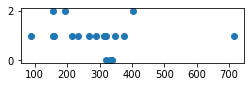

3


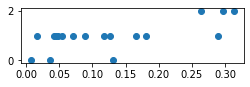

4


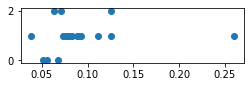

5


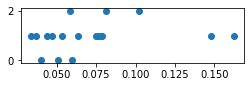

6


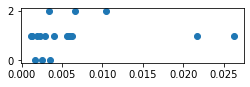

7


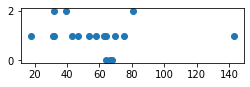

8


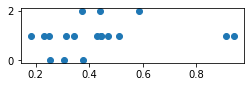

9


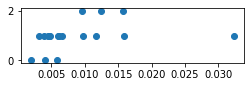

10


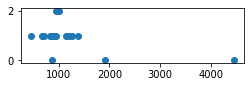

11


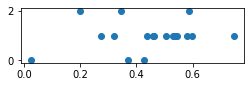

12


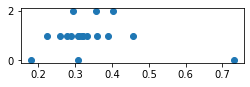

13


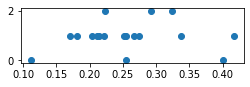

14


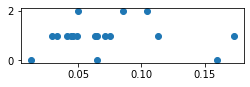

15


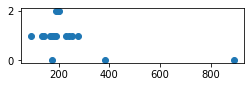

16


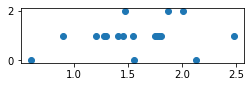

17


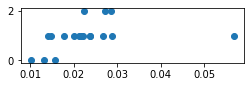

18


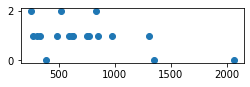

19


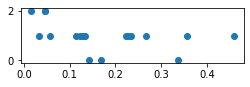

20


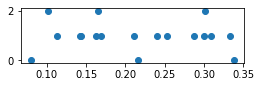

21


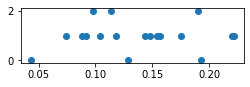

22


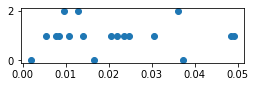

23


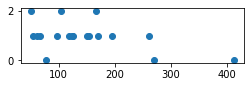

24


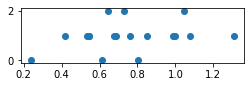

25


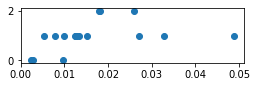

26


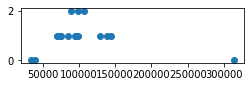

27


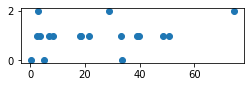

28


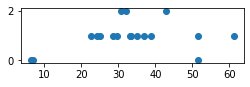

29


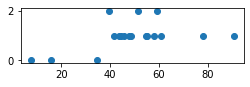

30


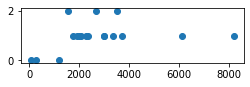

31


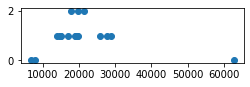

32


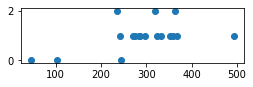

33


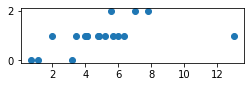

34


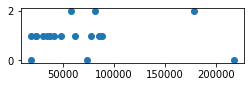

35


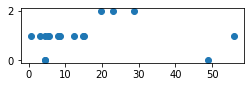

36


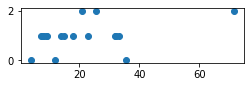

37


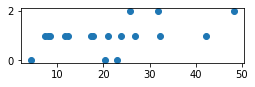

38


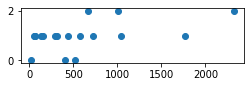

39


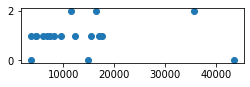

40


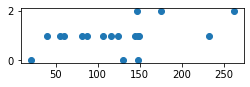

41


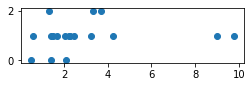

42


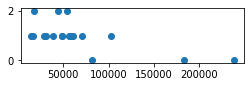

43


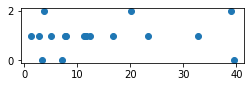

44


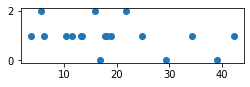

45


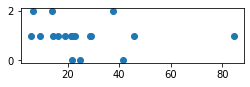

46


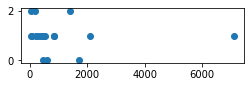

47


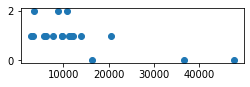

48


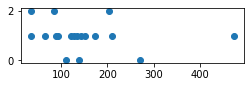

49


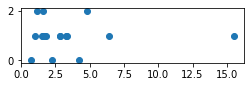

50


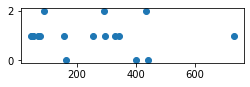

51


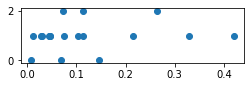

52


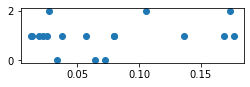

53


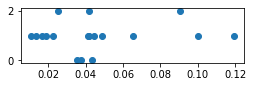

54


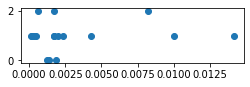

55


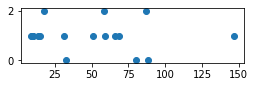

56


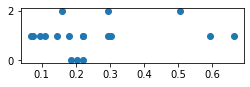

57


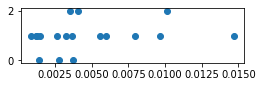

58


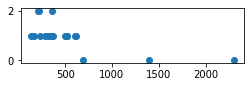

59


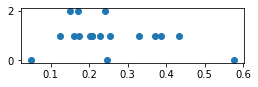

60


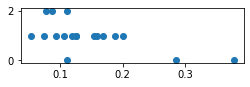

61


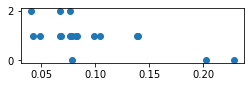

62


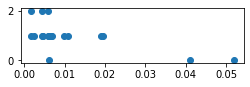

63


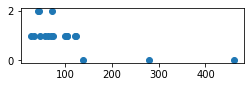

64


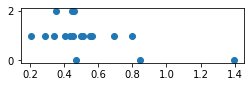

65


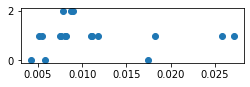

66


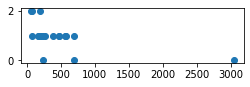

67


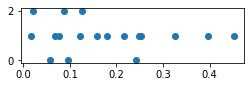

68


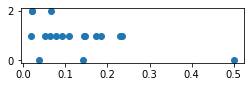

69


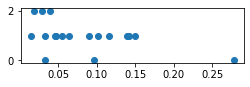

70


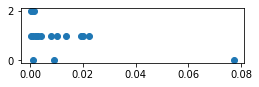

71


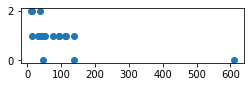

72


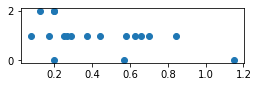

73


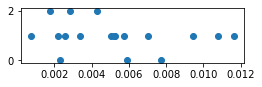

74


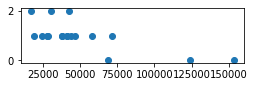

75


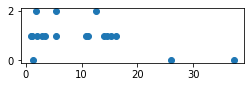

76


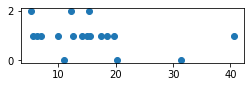

77


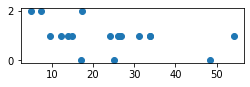

78


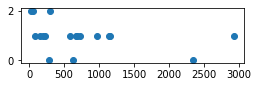

79


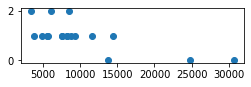

80


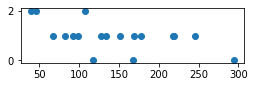

81


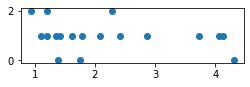

82


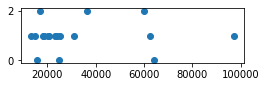

83


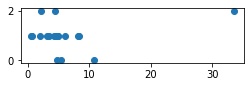

84


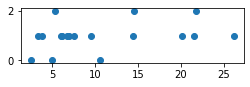

85


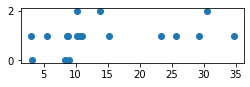

86


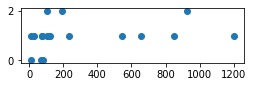

87


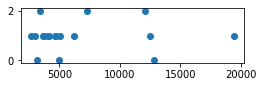

88


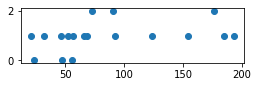

89


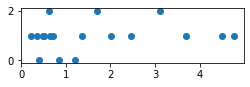

90


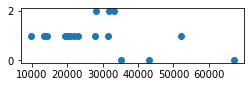

91


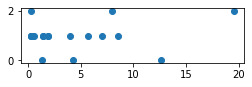

92


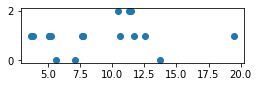

93


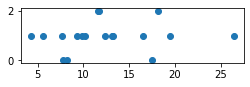

94


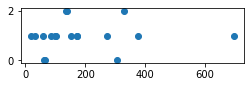

In [ ]:
Handed = [0,1, 0,1, 0,1, 0,1, 0,1, 0,1, 0,1, 0,1, 0,1]
Handed = pd.DataFrame(Handed)
# print(Handed)
# Importing the dataset
dataset = pd.read_csv('/content/drive/MyDrive/Extracted_Features.csv')
# print(dataset)
"""with all sensors"""
# X = dataset.iloc[20:38, 2:].values
for f in range(2,95):
    X = dataset.iloc[20:38, f].values
    # X = dataset.iloc[:, f].values
    y = dataset.iloc[:, 0].values
    print(f)
    f = plt.figure()
    f.set_figwidth(4)
    f.set_figheight(1)
    plt.scatter(X, y)
    plt.show()

In [ ]:
"""normal regression"""
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
Handed = [0,1, 0,1, 0,1, 0,1, 0,1, 0,1, 0,1, 0,1, 0,1]
Handed = pd.DataFrame(Handed)
# print(Handed)
# Importing the dataset
dataset = pd.read_csv('/content/drive/MyDrive/Extracted_Features.csv')
# print(dataset)
"""with all sensors"""
# X = dataset.iloc[20:38, 2:].values
"""with only wrist sensors"""
X = dataset.iloc[20:38, 50:98].values
"""with only wristwx sensors"""
# X = dataset.iloc[20:38, 74:82].values
"""with only wristwy sensors"""
# X = dataset.iloc[20:38, 82:90].values
"""with only wristwz sensors"""
# X = dataset.iloc[20:38, 90:98].values
X = pd.DataFrame(X)
X.insert(0, "Handed", Handed, True)
X = X.to_numpy()
# print(X)
# print(np.shape(X))
# Rigidity_number_of_LH_RH = [0,0, 0,1, 2,1, 2,2, 1,1, 1,1, 1,1, 1,1, 1,1]
"""If I use rigidities calculated by Ahmad's model, it literally means a regression from an other regression, so the results wouldn't be reliable, so we can
either use the real rigidity numbers from UPDRS test and compare the results, or doing regression useing Effective decay rate from Ahmad's calculations and
then use them in Ahmad's aquation to get the rigidity number"""
y = [0,0, 0,1, 2,1, 2,2, 1,1, 1,1, 1,1, 1,1, 1,1]
# Effective_decay_rate_PD_off = [0.7650113, 1.22300482, 0.4098073, 0.8496922, 2.6803, 2.26057436,3.8271,1.105293,
                              #  1.3608,0.8136, 2.00839584,0.85080828, 0.9515, 2.1134, 1.3875, 1.7199,1.5980,2.0737]
# y = [0.7650113, 1.22300482, 0.4098073, 0.8496922, 2.6803, 2.26057436,3.8271,1.105293,
    #  1.3608,0.8136, 2.00839584,0.85080828, 0.9515, 2.1134, 1.3875, 1.7199,1.5980,2.0737]
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_y = StandardScaler()
X = sc_X.fit_transform(X)

#Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state =20)
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

from sklearn.model_selection import cross_val_score
print("LinearRegression")
# Training the Multiple Linear Regression model on the Training set
from sklearn.linear_model import LinearRegression
Lin_regressor = LinearRegression()
scores = cross_val_score(Lin_regressor, X, y, scoring='r2', cv=5)
print(scores)
print(scores.mean())
var = np.var(scores)
print("var=", var)

# # Polynomial Regression
# from sklearn.preprocessing import PolynomialFeatures
# poly_reg = PolynomialFeatures(degree = 4)
# X_poly = poly_reg.fit_transform(X)
# lin_reg = LinearRegression()
# scores = cross_val_score(lin_reg, X_poly, y, scoring='r2', cv=5)
# print(scores)
# print(scores.mean())

# Support Vector Regression (SVR)
from sklearn.svm import SVR
SVR_regressor = SVR(kernel = 'rbf')
scores = cross_val_score(SVR_regressor, X, y, scoring='r2', cv=5)
print(scores)
print(scores.mean())
var = np.var(scores)
print("var=", var)

# DecisionTreeRegressor
from sklearn.tree import DecisionTreeRegressor
DT_regressor = DecisionTreeRegressor()
scores = cross_val_score(DT_regressor, X, y, scoring='r2', cv=5)
print(scores)
print(scores.mean())
var = np.var(scores)
print("var=", var)

# Random Forest Regression
from sklearn.ensemble import RandomForestRegressor
RF_regressor = RandomForestRegressor(n_estimators = 10)
scores = cross_val_score(RF_regressor, X, y, scoring='r2', cv=5)
print(scores)
print(scores.mean())
var = np.var(scores)
print("var=", var)

LinearRegression
[-13.70426628  -6.30925496   0.           0.           0.        ]
-4.002704248701913
var= 29.501081194866458
[-4.78097411 -4.124898    0.          0.          0.        ]
-1.7811744219247685
var= 4.8019170684729255
[-3. -3.  0.  0.  0.]
-1.2
var= 2.1599999999999997
[-3.86666667 -3.28        0.          0.          0.        ]
-1.4293333333333333
var= 3.0989084444444446


Lasso Regression

In [ ]:
"""Lassocrosval shoewed better results than Lasso"""
#Lasso Regression

from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
Handed = [0,1, 0,1, 0,1, 0,1, 0,1, 0,1, 0,1, 0,1, 0,1]
Handed = pd.DataFrame(Handed)
# print(Handed)
# Importing the dataset
dataset = pd.read_csv('/content/drive/MyDrive/Extracted_Features.csv')
# print(dataset)
"""with all sensors"""
# X = dataset.iloc[20:38, 2:].values
"""with only wrist sensors"""
# X = dataset.iloc[20:38, 50:98].values
"""with only wristwx sensors"""
# X = dataset.iloc[20:38, 74:82].values
"""with only wristwy sensors"""
# X = dataset.iloc[20:38, 82:90].values
"""with only wristwz sensors"""
X = dataset.iloc[20:38, 90:98].values
X = pd.DataFrame(X)
X.insert(0, "Handed", Handed, True)
X = X.to_numpy()
# print(X)
# print(np.shape(X))
# Rigidity_number_of_LH_RH = [0,0, 0,1, 2,1, 2,2, 1,1, 1,1, 1,1, 1,1, 1,1]
y = [0,0, 0,1, 2,1, 2,2, 1,1, 1,1, 1,1, 1,1, 1,1]

from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_y = StandardScaler()
X = sc_X.fit_transform(X)

#Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

from sklearn.linear_model import Lasso

lasso = Lasso(alpha=1.0)
# fit model
lasso.fit(X, y)

# make a prediction
y_pred = lasso.predict(X_test)
# summarize prediction

print(y_test, y_pred)

# lasso.score(X_test, y_test), lasso.score(X_train, y_train)


# coef = lasso.coef_

"""why y_pred is the same for all of them?"""



[1, 1, 0, 2] [1. 1. 1. 1.]


'why y_pred is the same for all of them?'

In [ ]:

# use automatically configured the lasso regression algorithm
from numpy import arange
from pandas import read_csv
from sklearn.linear_model import LassoCV
from sklearn.model_selection import RepeatedKFold
# load the dataset
"""Lassocrosval shoewed better results than Lasso"""
#Lasso Regression

from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
Handed = [0,1, 0,1, 0,1, 0,1, 0,1, 0,1, 0,1, 0,1, 0,1]
Handed = pd.DataFrame(Handed)
# print(Handed)
# Importing the dataset
dataset = pd.read_csv('/content/drive/MyDrive/Extracted_Features.csv')
# print(dataset)
X = dataset.iloc[20:38, 2:].values
X = pd.DataFrame(X)
X.insert(97, "Handed", Handed, True)
X = X.to_numpy()
# print(X)
# print(np.shape(X))
# Rigidity_number_of_LH_RH = [0,0, 0,1, 2,1, 2,2, 1,1, 1,1, 1,1, 1,1, 1,1]
y = [0,0, 0,1, 2,1, 2,2, 1,1, 1,1, 1,1, 1,1, 1,1]

from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_y = StandardScaler()
X = sc_X.fit_transform(X)

#Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
# define model evaluation method
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
# define model
model = LassoCV(alphas=arange(0, 1, 0.01), cv=cv, n_jobs=-1)
# fit model
model.fit(X_train, y_train)
# summarize chosen configuration
print('alpha: %f' % model.alpha_)

y_pred = model.predict(X_test)
print(y_pred)
print(y_test)
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared = False)
r2 = r2_score(y_test, y_pred)
print("mse =", mse, "emse = ", rmse, "r2 = ", r2)


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  coef_, l1_reg, l2_

alpha: 0.030000
[1.17367129 0.88296798 0.84672138 1.47525863]
[1, 1, 0, 2]
mse = 0.2590372051798688 emse =  0.5089569777298164 r2 =  0.48192558964026244


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  coef_, l1_reg, l2_

Lasso Cros Validation

In [ ]:
from sklearn.linear_model import LassoCV
Handed = [0,1, 0,1, 0,1, 0,1, 0,1, 0,1, 0,1, 0,1, 0,1]
Handed = pd.DataFrame(Handed)
# print(Handed)
# Importing the dataset
dataset = pd.read_csv('/content/drive/MyDrive/Extracted_Features.csv')
# print(dataset)
X = dataset.iloc[20:38, 2:].values
X = pd.DataFrame(X)
X.insert(97, "Handed", Handed, True)
X = X.to_numpy()
# print(X)
# print(np.shape(X))
# Rigidity_number_of_LH_RH = [0,0, 0,1, 2,1, 2,2, 1,1, 1,1, 1,1, 1,1, 1,1]
y = [0,0, 0,1, 2,1, 2,2, 1,1, 1,1, 1,1, 1,1, 1,1]
# Create an instance of Lasso Regression implementation
#
lasso_cv = LassoCV(cv=5)
#
# Fit the Lasso model
#
lasso_cv.fit(X, y)
#
# Create the model score
lasso_cv.score(X, y)
# X_test = dataset.iloc[35, 2:].values
# y_test = 1
# y_pred = lasso_cv.predict(X_test)

0.7680814612369034

LOO cros  validation

In [ ]:
"""Leave-One-Out Cross-Validation"""

Handed = [0,1, 0,1, 0,1, 0,1, 0,1, 0,1, 0,1, 0,1, 0,1]
Handed = pd.DataFrame(Handed)
# print(Handed)
# Importing the dataset
dataset = pd.read_csv('/content/drive/MyDrive/Extracted_Features.csv')
# print(dataset)
X = dataset.iloc[20:38, 2:].values
X = pd.DataFrame(X)
X.insert(97, "Handed", Handed, True)
X = X.to_numpy()
# print(X)
# print(np.shape(X))
# Rigidity_number_of_LH_RH = [0,0, 0,1, 2,1, 2,2, 1,1, 1,1, 1,1, 1,1, 1,1]
y = [0,0, 0,1, 2,1, 2,2, 1,1, 1,1, 1,1, 1,1, 1,1]

from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_y = StandardScaler()
X = sc_X.fit_transform(X)

#define cross-validation method to use
cv = LeaveOneOut()


# Training the Multiple Linear Regression model on the Training set
from sklearn.linear_model import LinearRegression
Lin_regressor = LinearRegression()
Lin_regressor.fit(X, y)
# Predicting the Test set results
scores = cross_val_score(Lin_regressor , X, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
print("LogisticRegression")
#view mean absolute error
mae = mean(absolute(scores))
print("mae =", mae)
rmse = sqrt(mean(absolute(scores)))
print("emse =",rmse)


# # Polynomial Regression
# from sklearn.preprocessing import PolynomialFeatures
# poly_reg = PolynomialFeatures(degree = 4)
# X_poly = poly_reg.fit_transform(X)
# lin_reg = LinearRegression()
# lin_reg.fit(X_poly, y)
# y_pred = lin_reg.predict(X_test)
# print(y_pred)
# print(y_test)


# Support Vector Regression (SVR)
from sklearn.svm import SVR
SVR_regressor = SVR(kernel = 'rbf')
SVR_regressor.fit(X_train, y_train)
y_pred = SVR_regressor.predict(X_test)

scores = cross_val_score(classifier_L_R , X, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
print("LogisticRegression")
#view mean absolute error
mae = mean(absolute(scores))
print("mae =", mae)
rmse = sqrt(mean(absolute(scores)))
print("emse =",rmse)

print("SVR")
print(y_pred)
print(y_test)
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared = False)
r2 = r2_score(y_test, y_pred)
print("mse =", mse, "emse = ", rmse, "r2 = ", r2)

# DecisionTreeRegressor
from sklearn.tree import DecisionTreeRegressor
DT_regressor = DecisionTreeRegressor(random_state = 0)
DT_regressor.fit(X_train, y_train)
scores = cross_val_score(classifier_L_R , X, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
print("LogisticRegression")
#view mean absolute error
mae = mean(absolute(scores))
print("mae =", mae)
rmse = sqrt(mean(absolute(scores)))
print("emse =",rmse)
y_pred = DT_regressor.predict(X_test)

print("DecisionTreeRegressor")
print(y_pred)
print(y_test)
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared = False)
r2 = r2_score(y_test, y_pred)
print("mse =", mse, "emse = ", rmse, "r2 = ", r2)


# Random Forest Regression
from sklearn.ensemble import RandomForestRegressor
RF_regressor = RandomForestRegressor(n_estimators = 10, random_state = 0)
RF_regressor.fit(X, y)
y_pred = RF_regressor.predict(X_test)
scores = cross_val_score(classifier_L_R , X, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
print("LogisticRegression")
#view mean absolute error
mae = mean(absolute(scores))
print("mae =", mae)
rmse = sqrt(mean(absolute(scores)))
print("emse =",rmse)
print("RandomForestRegressor")
print(y_pred)
print(y_test)
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared = False)
r2 = r2_score(y_test, y_pred)
print("mse =", mse, "emse = ", rmse, "r2 = ", r2)

"""why r2 is low and sometimes even negative in LR and DT while results are good?"""
"""SVR showed the best results for different tries """





LogisticRegression
0.34210526315789475
0.6882472016116853
rbfSVM
0.34210526315789475
0.6488856845230502
DesisionTree
0.34210526315789475
0.6488856845230502
RandomForest
0.34210526315789475
0.5619514869490163
KNN
0.34210526315789475
0.5848976518656018
Naive_Bayes
0.34210526315789475
0.5848976518656018


'LOO showed very good results\nbut why some of theme are the same?'

In [ ]:
"""normal regression"""
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
Handed = [0,1, 0,1, 0,1, 0,1, 0,1, 0,1, 0,1, 0,1, 0,1]
Handed = pd.DataFrame(Handed)
# print(Handed)
# Importing the dataset
dataset = pd.read_csv('/content/drive/MyDrive/Extracted_Features.csv')
# print(dataset)
X = dataset.iloc[20:38, 2:].values
X = pd.DataFrame(X)
X.insert(97, "Handed", Handed, True)
X = X.to_numpy()
# print(X)
# print(np.shape(X))
# Rigidity_number_of_LH_RH = [0,0, 0,1, 2,1, 2,2, 1,1, 1,1, 1,1, 1,1, 1,1]
y = [0,0, 0,1, 2,1, 2,2, 1,1, 1,1, 1,1, 1,1, 1,1]

from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_y = StandardScaler()
X = sc_X.fit_transform(X)

#Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state =20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import cross_val_score

# Training the Multiple Linear Regression model on the Training set
from sklearn.linear_model import LinearRegression
Lin_regressor = LinearRegression()
Lin_regressor.fit(X_train, y_train)
# Predicting the Test set results
y_pred = Lin_regressor.predict(X_test)
print("LinearRegression")
print(y_pred)
print(y_test)
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared = False)
r2 = r2_score(y_test, y_pred)
print("mse =", mse, "emse = ", rmse, "r2 = ", r2)

# # Polynomial Regression
# from sklearn.preprocessing import PolynomialFeatures
# poly_reg = PolynomialFeatures(degree = 4)
# X_poly = poly_reg.fit_transform(X)
# lin_reg = LinearRegression()
# lin_reg.fit(X_poly, y)
# y_pred = lin_reg.predict(X_test)
# print(y_pred)
# print(y_test)


# Support Vector Regression (SVR)
from sklearn.svm import SVR
SVR_regressor = SVR(kernel = 'rbf')
SVR_regressor.fit(X_train, y_train)
y_pred = SVR_regressor.predict(X_test)
print("SVR")
print(y_pred)
print(y_test)
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared = False)
r2 = r2_score(y_test, y_pred)
print("mse =", mse, "emse = ", rmse, "r2 = ", r2)

# DecisionTreeRegressor
from sklearn.tree import DecisionTreeRegressor
DT_regressor = DecisionTreeRegressor(random_state = 0)
DT_regressor.fit(X_train, y_train)
y_pred = DT_regressor.predict(X_test)
print("DecisionTreeRegressor")
print(y_pred)
print(y_test)
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared = False)
r2 = r2_score(y_test, y_pred)
print("mse =", mse, "emse = ", rmse, "r2 = ", r2)


# Random Forest Regression
from sklearn.ensemble import RandomForestRegressor
RF_regressor = RandomForestRegressor(n_estimators = 10, random_state = 0)
RF_regressor.fit(X, y)
y_pred = RF_regressor.predict(X_test)
print("RandomForestRegressor")
print(y_pred)
print(y_test)
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared = False)
r2 = r2_score(y_test, y_pred)
print("mse =", mse, "emse = ", rmse, "r2 = ", r2)

"""why r2 is low and sometimes even negative in LR and DT while results are good?"""
"""SVR showed the best results for different tries """



LinearRegression
[0.75331668 1.29685483 1.69459567 0.95506688 0.72612412]
[0, 2, 2, 0, 1]
mse = 0.42846634050028226 emse =  0.6545734034470713 r2 =  0.4644170743746472
SVR
[0.85689444 0.98999937 0.9349414  0.8190263  0.95772025]
[0, 2, 2, 0, 1]
mse = 0.7122621674139602 emse =  0.8439562591828799 r2 =  0.1096722907325497
DecisionTreeRegressor
[0. 1. 1. 1. 1.]
[0, 2, 2, 0, 1]
mse = 0.6 emse =  0.7745966692414834 r2 =  0.25
RandomForestRegressor
[0.4 1.7 1.4 0.4 0.9]
[0, 2, 2, 0, 1]
mse = 0.15600000000000003 emse =  0.39496835316263 r2 =  0.8049999999999999


'SVR showed the best results for different tries '

In [ ]:

"""normal regression"""
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
Handed = [0,1, 0,1, 0,1, 0,1, 0,1, 0,1, 0,1, 0,1, 0,1]
Handed = pd.DataFrame(Handed)
# print(Handed)
# Importing the dataset
dataset = pd.read_csv('/content/drive/MyDrive/Extracted_Features.csv')
# print(dataset)
"""with all sensors"""
# X = dataset.iloc[20:38, 2:].values
"""with only wrist sensors"""
X = dataset.iloc[20:38, 50:98].values
"""with only wristwx sensors"""
# X = dataset.iloc[20:38, 74:82].values
"""with only wristwy sensors"""
# X = dataset.iloc[20:38, 82:90].values
"""with only wristwz sensors"""
# X = dataset.iloc[20:38, 90:98].values
X = pd.DataFrame(X)
X.insert(0, "Handed", Handed, True)
X = X.to_numpy()
# print(X)
# print(np.shape(X))
# Rigidity_number_of_LH_RH = [0,0, 0,1, 2,1, 2,2, 1,1, 1,1, 1,1, 1,1, 1,1]
"""If I use rigidities calculated by Ahmad's model, it literally means a regression from an other regression, so the results wouldn't be reliable, so we can
either use the real rigidity numbers from UPDRS test and compare the results, or doing regression useing Effective decay rate from Ahmad's calculations and
then use them in Ahmad's aquation to get the rigidity number"""
y = [0,0, 0,1, 2,1, 2,2, 1,1, 1,1, 1,1, 1,1, 1,1]
# Effective_decay_rate_PD_off = [0.7650113, 1.22300482, 0.4098073, 0.8496922, 2.6803, 2.26057436,3.8271,1.105293,
                              #  1.3608,0.8136, 2.00839584,0.85080828, 0.9515, 2.1134, 1.3875, 1.7199,1.5980,2.0737]
# y = [0.7650113, 1.22300482, 0.4098073, 0.8496922, 2.6803, 2.26057436,3.8271,1.105293,
    #  1.3608,0.8136, 2.00839584,0.85080828, 0.9515, 2.1134, 1.3875, 1.7199,1.5980,2.0737]
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_y = StandardScaler()
X = sc_X.fit_transform(X)

#Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 20)
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import cross_val_score

#LOGISTICREGRESSION
from sklearn.linear_model import LogisticRegression
classifier_L_R = LogisticRegression()
classifier_L_R.fit(X_train, y_train)
y_pred = classifier_L_R.predict(X_test)
print("LogisticRegression")
print(classifier_L_R.score(X_train,y_train))
from sklearn.metrics import confusion_matrix
cm_L_R = confusion_matrix(y_test, y_pred)
print(cm_L_R)
print(classification_report(y_test, y_pred))
# scores = cross_val_score(LogisticRegression(), X, y, cv=5)
scores = cross_val_score(LogisticRegression(), X, y, cv=2)
print(scores)
print(scores.mean())



#rbfSVM Classification
from sklearn.svm import SVC
classifier_SVC = SVC(kernel = "rbf")
classifier_SVC.fit(X_train, y_train)
y_pred = classifier_SVC.predict(X_test)
print("rbfSVM")
print(classifier_SVC.score(X_train,y_train))
from sklearn.metrics import confusion_matrix
cm_SVC = confusion_matrix(y_test, y_pred)
print(cm_SVC)
print(classification_report(y_test, y_pred))
# scores = cross_val_score(SVC(), X, y, cv=5)
scores = cross_val_score(SVC(), X, y, cv=2)
print(scores)
print(scores.mean())

#DecisionTree Classification
from sklearn.tree import DecisionTreeClassifier
classifier_DT = DecisionTreeClassifier(criterion = "entropy")
classifier_DT.fit(X_train, y_train)
y_pred = classifier_DT.predict(X_test)
print("DesisionTree")
print(classifier_DT.score(X_train,y_train))
cm_DT = confusion_matrix(y_test, y_pred)
print(cm_DT)
print(classification_report(y_test, y_pred))
# scores = cross_val_score(DecisionTreeClassifier(), X, y, cv=5)
scores = cross_val_score(DecisionTreeClassifier(), X, y, cv=2)
print(scores)
print(scores.mean())

#RandomForest
from sklearn.ensemble import RandomForestClassifier
classifier_R_F = RandomForestClassifier(n_estimators=100, criterion = "entropy")
classifier_R_F.fit(X_train, y_train)
y_pred = classifier_R_F.predict(X_test)
print("RandomForest")
print(classifier_R_F.score(X_train,y_train))
cm_R_F = confusion_matrix(y_test, y_pred)
print(cm_R_F)
print(classification_report(y_test, y_pred))
# scores = cross_val_score(RandomForestClassifier(), X, y, cv=5)
scores = cross_val_score(RandomForestClassifier(), X, y, cv=2)
print(scores)
print(scores.mean())

#KNN
from sklearn.neighbors import KNeighborsClassifier
classifier_KNN = KNeighborsClassifier()
classifier_KNN.fit(X_train, y_train)
y_pred = classifier_KNN.predict(X_test)
print("KNN")
print(classifier_KNN.score(X_train,y_train))
cm_KNN = confusion_matrix(y_test, y_pred)
print(cm_KNN)
print(classification_report(y_test, y_pred))
# scores = cross_val_score(KNeighborsClassifier(), X, y, cv=5)
scores = cross_val_score(KNeighborsClassifier(), X, y, cv=2)
print(scores)
print(scores.mean())

#Naive_Bayes
from sklearn.naive_bayes import GaussianNB
classifier_N_B = GaussianNB()
classifier_N_B.fit(X_train, y_train)
y_pred = classifier_N_B.predict(X_test)
print("Naive_Bayes")
print(classifier_N_B.score(X_train,y_train))
cm_N_B = confusion_matrix(y_test, y_pred)
print(cm_N_B)
print(classification_report(y_test, y_pred))
# scores = cross_val_score(GaussianNB(), X, y, cv=5)
scores = cross_val_score(GaussianNB(), X, y, cv=2)
print(scores)
print(scores.mean())

LogisticRegression
1.0
[[0 1 0]
 [0 2 2]
 [0 0 0]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.67      0.50      0.57         4
           2       0.00      0.00      0.00         0

    accuracy                           0.40         5
   macro avg       0.22      0.17      0.19         5
weighted avg       0.53      0.40      0.46         5

[0.66666667 0.33333333]
0.5
rbfSVM
0.8461538461538461
[[0 1]
 [0 4]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.80      1.00      0.89         4

    accuracy                           0.80         5
   macro avg       0.40      0.50      0.44         5
weighted avg       0.64      0.80      0.71         5

[0.66666667 0.66666667]
0.6666666666666666
DesisionTree
1.0
[[1 0 0]
 [0 2 2]
 [0 0 0]]
              precision    recall  f1-score   support

           0       1.00      

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1

[0.55555556 0.66666667]
0.6111111111111112
KNN
0.6153846153846154
[[0 1]
 [0 4]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.80      1.00      0.89         4

    accuracy                           0.80         5
   macro avg       0.40      0.50      0.44         5
weighted avg       0.64      0.80      0.71         5

[0.66666667 0.66666667]
0.6666666666666666
Naive_Bayes
0.9230769230769231
[[0 1]
 [0 4]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.80      1.00      0.89         4

    accuracy                           0.80         5
   macro avg       0.40      0.50      0.44         5
weighted avg       0.64      0.80      0.71         5

[0.66666667 0.66666667]
0.6666666666666666


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classificat

# Extra

In [ ]:
# #LOGISTICREGRESSION
# classifier_L_R = LogisticRegression()
# classifier_L_R.fit(X_train, y_train)
# y_pred = classifier_L_R.predict(X_test)
# print("LogisticRegression")
# print(classifier_L_R.score(X_train,y_train))

# cm_L_R = confusion_matrix(y_test, y_pred)
# print(cm_L_R)
# print(classification_report(y_test, y_pred))
# scores = cross_val_score(LogisticRegression(), X, y, scoring='accuracy', cv=5)
# # scores = cross_val_score(LogisticRegression(), X, y, scoring='accuracy', cv=2)
# print("scores=", scores)
# rmse = sqrt(mean(absolute(scores)))
# print("rmse =", rmse)
# var = np.var(scores)
# print("var=", var)
# print("scores.mean=",scores.mean())



# #rbfSVM Classification

# classifier_SVC = SVC(kernel = "rbf")
# classifier_SVC.fit(X_train, y_train)
# y_pred = classifier_SVC.predict(X_test)
# print("rbfSVM")
# print(classifier_SVC.score(X_train,y_train))

# cm_SVC = confusion_matrix(y_test, y_pred)
# print(cm_SVC)
# print(classification_report(y_test, y_pred))
# # scores = cross_val_score(SVC(), X, y, cv=5)
# scores = cross_val_score(SVC(), X, y, cv=2)
# print(scores)
# var = np.var(scores)
# print("var=", var)
# print(scores.mean())

# # create loocv procedure
# cv = LeaveOneOut()
# # create model
# model = RandomForestClassifier(random_state=1)
# # evaluate model
# scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
# # report performance
# print('Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))
# #DecisionTree Classification

# classifier_DT = DecisionTreeClassifier(criterion = "entropy")
# classifier_DT.fit(X_train, y_train)
# y_pred = classifier_DT.predict(X_test)
# print("DesisionTree")
# print(classifier_DT.score(X_train,y_train))
# cm_DT = confusion_matrix(y_test, y_pred)
# print(cm_DT)
# print(classification_report(y_test, y_pred))
# # scores = cross_val_score(DecisionTreeClassifier(), X, y, cv=5)
# scores = cross_val_score(DecisionTreeClassifier(), X, y, cv=2)
# print(scores)
# var = np.var(scores)
# print("var=", var)
# print(scores.mean())

# #RandomForest

# classifier_R_F = RandomForestClassifier(n_estimators=100, criterion = "entropy")
# classifier_R_F.fit(X_train, y_train)
# y_pred = classifier_R_F.predict(X_test)
# print("RandomForest")
# print(classifier_R_F.score(X_train,y_train))
# cm_R_F = confusion_matrix(y_test, y_pred)
# print(cm_R_F)
# print(classification_report(y_test, y_pred))
# # scores = cross_val_score(RandomForestClassifier(), X, y, cv=5)
# scores = cross_val_score(RandomForestClassifier(), X, y, cv=2)
# print(scores)
# var = np.var(scores)
# print("var=", var)
# print(scores.mean())

# #KNN
# classifier_KNN = KNeighborsClassifier()
# classifier_KNN.fit(X_train, y_train)
# y_pred = classifier_KNN.predict(X_test)
# print("KNN")
# print(classifier_KNN.score(X_train,y_train))
# cm_KNN = confusion_matrix(y_test, y_pred)
# print(cm_KNN)
# print(classification_report(y_test, y_pred))
# # scores = cross_val_score(KNeighborsClassifier(), X, y, cv=5)
# scores = cross_val_score(KNeighborsClassifier(), X, y, cv=2)
# print(scores)
# var = np.var(scores)
# print("var=", var)
# print(scores.mean())

# #Naive_Bayes
# from sklearn.naive_bayes import GaussianNB
# classifier_N_B = GaussianNB()
# classifier_N_B.fit(X_train, y_train)
# y_pred = classifier_N_B.predict(X_test)
# print("Naive_Bayes")
# print(classifier_N_B.score(X_train,y_train))
# cm_N_B = confusion_matrix(y_test, y_pred)
# print(cm_N_B)
# print(classification_report(y_test, y_pred))
# # scores = cross_val_score(GaussianNB(), X, y, cv=5)
# scores = cross_val_score(GaussianNB(), X, y, cv=2)
# print(scores)
# var = np.var(scores)
# print("var=", var)
# print(scores.mean())

LogisticRegression
0.6785714285714286
[[3 4]
 [0 3]]
              precision    recall  f1-score   support

           0       1.00      0.43      0.60         7
           1       0.43      1.00      0.60         3

    accuracy                           0.60        10
   macro avg       0.71      0.71      0.60        10
weighted avg       0.83      0.60      0.60        10

scores= [0.5        0.75       0.75       0.57142857 0.28571429]
rmse = 0.7559289460184544
var= 0.030102040816326538
scores.mean= 0.5714285714285714
rbfSVM
0.7142857142857143
[[3 4]
 [0 3]]
              precision    recall  f1-score   support

           0       1.00      0.43      0.60         7
           1       0.43      1.00      0.60         3

    accuracy                           0.60        10
   macro avg       0.71      0.71      0.60        10
weighted avg       0.83      0.60      0.60        10

[0.52631579 0.63157895]
var= 0.0027700831024930744
0.5789473684210527
DesisionTree
1.0
[[3 4]
 [1 2]]
 

In [ ]:
"""Leave-One-Out Cross-Validation
leave-one-out cross-validation (LOOCV), uses the following approach:
1. Split a dataset into a training set and a testing set, using all but one observation as part of the training set.
2. Build a model using only data from the training set.
3. Use the model to predict the response value of the one observation left out of the model and calculate the mean squared error (MSE).
4. Repeat this process n times. Calculate the test MSE to be the average of all of the test MSE’s.
the lower the MAE, the more closely a model is able to predict the actual observations
The lower the RMSE, the more closely a model is able to predict the actual observations. """
# Importing the dataset
dataset = pd.read_csv('/content/drive/MyDrive/Extracted_Features.csv')
# print(dataset)
"""with all sensors"""
# X = dataset.iloc[:38, 2:].values
"""with only wrist sensors"""
# X = dataset.iloc[:38, 50:98].values
"""with only wristwx sensors"""
# X = dataset.iloc[:38, 74:82].values
"""with only wristwy sensors"""
X = dataset.iloc[:38, 82:90].values
"""with only wristwz sensors"""
# X = dataset.iloc[:38, 90:98].values
y = dataset.iloc[:38, 0].values

from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_y = StandardScaler()
X = sc_X.fit_transform(X)

#define cross-validation method to use
from sklearn.model_selection import LeaveOneOut
from numpy import mean
from numpy import absolute
from numpy import sqrt
from sklearn.model_selection import cross_val_score
cv = LeaveOneOut()

#LOGISTICREGRESSION
from sklearn.linear_model import LogisticRegression
classifier_L_R = LogisticRegression()
#use LOOCV to evaluate model
scores = cross_val_score(classifier_L_R , X, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)

print("LogisticRegression")
# print("mean=",scores.mean())
var = np.var(scores)
print("var=", var)
#view mean absolute error
mae = mean(absolute(scores))
print(mae)
rmse = sqrt(mean(absolute(scores)))
print(rmse)



#rbfSVM Classification
from sklearn.svm import SVC
classifier_SVC = SVC(kernel = "rbf")
#use LOOCV to evaluate model
scores = cross_val_score(classifier_SVC , X, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
print("rbfSVM")
var = np.var(scores)
print("var=", var)
#view mean absolute error
mae = mean(absolute(scores))
print(mae)
rmse = sqrt(mean(absolute(scores)))
print(rmse)


#DecisionTree Classification
from sklearn.tree import DecisionTreeClassifier
classifier_DT = DecisionTreeClassifier(criterion = "entropy")
#use LOOCV to evaluate model
scores = cross_val_score(classifier_DT, X, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
print("DesisionTree")
var = np.var(scores)
print("var=", var)
#view mean absolute error
mae = mean(absolute(scores))
print(mae)
rmse = sqrt(mean(absolute(scores)))
print(rmse)


#RandomForest
from sklearn.ensemble import RandomForestClassifier
classifier_R_F = RandomForestClassifier(n_estimators=100, criterion = "entropy")
#use LOOCV to evaluate model
scores = cross_val_score(classifier_R_F , X, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
print("RandomForest")
var = np.var(scores)
print("var=", var)
#view mean absolute error
mae = mean(absolute(scores))
print(mae)
rmse = sqrt(mean(absolute(scores)))
print(rmse)


#KNN
from sklearn.neighbors import KNeighborsClassifier
classifier_KNN = KNeighborsClassifier()
#use LOOCV to evaluate model
scores = cross_val_score(classifier_KNN , X, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
print("KNN")
var = np.var(scores)
print("var=", var)
#view mean absolute error
mae = mean(absolute(scores))
print(mae)
rmse = sqrt(mean(absolute(scores)))
print(rmse)



#Naive_Bayes
from sklearn.naive_bayes import GaussianNB
classifier_N_B = GaussianNB()
#use LOOCV to evaluate model
scores = cross_val_score(classifier_N_B , X, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
print("Naive_Bayes")
var = np.var(scores)
print("var=", var)
#view mean absolute error
mae = mean(absolute(scores))
print(mae)
rmse = sqrt(mean(absolute(scores)))
print(rmse)




LogisticRegression
mean= -0.5
var= 0.25
0.5
0.7071067811865476
rbfSVM
var= 0.22506925207756237
0.6578947368421053
0.8111071056538127
DesisionTree
var= 0.2472299168975069
0.5526315789473685
0.7433919416750282
RandomForest
var= 0.24376731301939056
0.42105263157894735
0.6488856845230502
KNN
var= 0.22506925207756232
0.34210526315789475
0.5848976518656018
Naive_Bayes
var= 0.2493074792243768
0.47368421052631576
0.6882472016116853


Leave One Out Cros Validation (loocv)


PCA with 5 fold cros validation classification

In [ ]:
# Importing the dataset
dataset = pd.read_csv('/content/drive/MyDrive/Extracted_Features.csv')
# print(dataset)
"""with all sensors"""
# X = dataset.iloc[:38, 2:].values
"""with only wrist sensors"""
# X = dataset.iloc[:38, 50:98].values
"""with only wristwx sensors"""
# X = dataset.iloc[:38, 74:82].values
"""with only wristwy sensors"""
X = dataset.iloc[:38, 82:90].values
"""with only wristwz sensors"""
# X = dataset.iloc[:38, 90:98].values
y = dataset.iloc[:38, 0].values

sc_X = StandardScaler()
sc_y = StandardScaler()
X = sc_X.fit_transform(X)

from sklearn.decomposition import PCA
pca = PCA(n_components = 5)
X = pca.fit_transform(X)
explained_variance = pca.explained_variance_ratio_
#Splitting the dataset into the Training set and Test set

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state =20)


# from sklearn.decomposition import PCA
# pca = PCA(n_components = 10)
# X_train = pca.fit_transform(X_train)
# X_test = pca.transform(X_test)
# print(pd.DataFrame(X_train))
# explained_variance = pca.explained_variance_ratio_
# print(explained_variance)

#LOGISTICREGRESSION
classifier_L_R = LogisticRegression()
classifier_L_R.fit(X_train, y_train)
y_pred = classifier_L_R.predict(X_test)
print("LogisticRegression")
print(classifier_L_R.score(X_train,y_train))
cm_L_R = confusion_matrix(y_test, y_pred)
print(cm_L_R)
print(classification_report(y_test, y_pred))
scores = cross_val_score(LogisticRegression(), X, y, cv=5)
print(scores)
print(scores.mean())
var = np.var(scores)
print("var=", var)



#rbfSVM Classification
from sklearn.svm import SVC
classifier_SVC = SVC(kernel = "rbf")
classifier_SVC.fit(X_train, y_train)
y_pred = classifier_SVC.predict(X_test)
print("rbfSVM")
print(classifier_SVC.score(X_train,y_train))
from sklearn.metrics import confusion_matrix
cm_SVC = confusion_matrix(y_test, y_pred)
print(cm_SVC)
print(classification_report(y_test, y_pred))
scores = cross_val_score(SVC(), X, y, cv=5)
print(scores)
print(scores.mean())
var = np.var(scores)
print("var=", var)


#DecisionTree Classification
from sklearn.tree import DecisionTreeClassifier
classifier_DT = DecisionTreeClassifier(criterion = "entropy")
classifier_DT.fit(X_train, y_train)
y_pred = classifier_DT.predict(X_test)
print("DesisionTree")
print(classifier_DT.score(X_train,y_train))
cm_DT = confusion_matrix(y_test, y_pred)
print(cm_DT)
print(classification_report(y_test, y_pred))
scores = cross_val_score(DecisionTreeClassifier(), X, y, cv=5)
print(scores)
print(scores.mean())
var = np.var(scores)
print("var=", var)

#RandomForest
from sklearn.ensemble import RandomForestClassifier
classifier_R_F = RandomForestClassifier(n_estimators=100, criterion = "entropy")
classifier_R_F.fit(X_train, y_train)
y_pred = classifier_R_F.predict(X_test)
print("RandomForest")
print(classifier_R_F.score(X_train,y_train))
cm_R_F = confusion_matrix(y_test, y_pred)
print(cm_R_F)
print(classification_report(y_test, y_pred))
scores = cross_val_score(RandomForestClassifier(), X, y, cv=5)
print(scores)
print(scores.mean())
var = np.var(scores)
print("var=", var)

#KNN
from sklearn.neighbors import KNeighborsClassifier
classifier_KNN = KNeighborsClassifier()
classifier_KNN.fit(X_train, y_train)
y_pred = classifier_KNN.predict(X_test)
print("KNN")
print(classifier_KNN.score(X_train,y_train))
cm_KNN = confusion_matrix(y_test, y_pred)
print(cm_KNN)
print(classification_report(y_test, y_pred))
scores = cross_val_score(KNeighborsClassifier(), X, y, cv=5)
print(scores)
print(scores.mean())
var = np.var(scores)
print("var=", var)

#Naive_Bayes
from sklearn.naive_bayes import GaussianNB
classifier_N_B = GaussianNB()
classifier_N_B.fit(X_train, y_train)
y_pred = classifier_N_B.predict(X_test)
print("Naive_Bayes")
print(classifier_N_B.score(X_train,y_train))
cm_N_B = confusion_matrix(y_test, y_pred)
print(cm_N_B)
print(classification_report(y_test, y_pred))
scores = cross_val_score(GaussianNB(), X, y, cv=5)
print(scores)
print(scores.mean())
var = np.var(scores)
print("var=", var)

LogisticRegression
0.6785714285714286
[[3 4]
 [0 3]]
              precision    recall  f1-score   support

           0       1.00      0.43      0.60         7
           1       0.43      1.00      0.60         3

    accuracy                           0.60        10
   macro avg       0.71      0.71      0.60        10
weighted avg       0.83      0.60      0.60        10

[0.5        0.75       0.75       0.57142857 0.28571429]
0.5714285714285714
var= 0.030102040816326538
rbfSVM
0.7142857142857143
[[3 4]
 [0 3]]
              precision    recall  f1-score   support

           0       1.00      0.43      0.60         7
           1       0.43      1.00      0.60         3

    accuracy                           0.60        10
   macro avg       0.71      0.71      0.60        10
weighted avg       0.83      0.60      0.60        10

[0.5        0.75       0.625      0.42857143 0.71428571]
0.6035714285714285
var= 0.015102040816326535
DesisionTree
1.0
[[2 5]
 [1 2]]
              pr

PCA with Leave One Out

In [ ]:
# Importing the dataset
dataset = pd.read_csv('/content/drive/MyDrive/Extracted_Features.csv')
# print(dataset)
"""with all sensors"""
# X = dataset.iloc[:38, 2:].values
"""with only wrist sensors"""
# X = dataset.iloc[:38, 50:98].values
"""with only wristwx sensors"""
# X = dataset.iloc[:38, 74:82].values
"""with only wristwy sensors"""
X = dataset.iloc[:38, 82:90].values
"""with only wristwz sensors"""
# X = dataset.iloc[:38, 90:98].values
y = dataset.iloc[:38, 0].values

sc_X = StandardScaler()
sc_y = StandardScaler()
X = sc_X.fit_transform(X)

pca = PCA(n_components = 5)
X = pca.fit_transform(X)
# print(pd.DataFrame(X))
# explained_variance = pca.explained_variance_ratio_
# print(explained_variance)

cv = LeaveOneOut()

#LOGISTICREGRESSION
classifier_L_R = LogisticRegression()
#use LOOCV to evaluate model
scores = cross_val_score(classifier_L_R , X, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
print("LogisticRegression")
var = np.var(scores)
print("var=", var)
#view mean absolute error
mae = mean(absolute(scores))
print(mae)
rmse = sqrt(mean(absolute(scores)))
print(rmse)



#rbfSVM Classification
classifier_SVC = SVC(kernel = "rbf")
#use LOOCV to evaluate model
scores = cross_val_score(classifier_SVC , X, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
print("rbfSVM")
var = np.var(scores)
print("var=", var)
#view mean absolute error
mae = mean(absolute(scores))
print(mae)
rmse = sqrt(mean(absolute(scores)))
print(rmse)


#DecisionTree Classification
classifier_DT = DecisionTreeClassifier(criterion = "entropy")
#use LOOCV to evaluate model
scores = cross_val_score(classifier_DT, X, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
print("DesisionTree")
var = np.var(scores)
print("var=", var)
#view mean absolute error
mae = mean(absolute(scores))
print(mae)
rmse = sqrt(mean(absolute(scores)))
print(rmse)


#RandomForest
classifier_R_F = RandomForestClassifier(n_estimators=100, criterion = "entropy")
#use LOOCV to evaluate model
scores = cross_val_score(classifier_R_F , X, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
print("RandomForest")
var = np.var(scores)
print("var=", var)
#view mean absolute error
mae = mean(absolute(scores))
print(mae)
rmse = sqrt(mean(absolute(scores)))
print(rmse)


#KNN
classifier_KNN = KNeighborsClassifier()
#use LOOCV to evaluate model
scores = cross_val_score(classifier_KNN , X, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
print("KNN")
var = np.var(scores)
print("var=", var)
#view mean absolute error
mae = mean(absolute(scores))
print(mae)
rmse = sqrt(mean(absolute(scores)))
print(rmse)



#Naive_Bayes
classifier_N_B = GaussianNB()
#use LOOCV to evaluate model
scores = cross_val_score(classifier_N_B , X, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
print("Naive_Bayes")
var = np.var(scores)
print("var=", var)
#view mean absolute error
mae = mean(absolute(scores))
print(mae)
rmse = sqrt(mean(absolute(scores)))
print(rmse)


LogisticRegression
var= 0.24376731301939056
0.42105263157894735
0.6488856845230502
rbfSVM
var= 0.22506925207756237
0.6578947368421053
0.8111071056538127
DesisionTree
var= 0.24376731301939056
0.42105263157894735
0.6488856845230502
RandomForest
var= 0.24930747922437677
0.47368421052631576
0.6882472016116853
KNN
var= 0.22506925207756232
0.34210526315789475
0.5848976518656018
Naive_Bayes
var= 0.2326869806094182
0.631578947368421
0.7947194142390263
